<center><img src="https://media.istockphoto.com/id/1409257414/photo/industrial-wine-bottling-production-line.jpg?s=612x612&w=0&k=20&c=Rrdnxo10oH-KC_qlnQLf_OopxHs92jy5EeugxF3SJCo=" width="720"></center>

<center><font size=6>Uncorking Insights: Time Series Analysis and Forecasting of 20th Century Wine Sales</font></center>

## Problem Statement

##Context
As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

##Objective
The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.



# Installing  and Importing Necessary Libraries

In [1]:
# Installing Libraries for Import
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:00


In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time series specific libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Date and time handling
from datetime import datetime

# Warnings suppression
import warnings
warnings.filterwarnings("ignore")

# Visualization improvements
plt.style.use('fivethirtyeight')


# Sparkling Dataset

## Read the data as an appropriate time series data
- Loaded the Sparkling and Rose wine datasets from CSV files.  
- Converted the 'YearMonth' column to a datetime format for proper handling of time-based data.  
- Set the 'YearMonth' column as the index for both datasets to ensure they are structured as time series data.  

This structure ensures that the data is ready for time series analysis and forecasting models.

### Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_sparkling = pd.read_csv('drive/My Drive/Great Learning/TSF Project/Sparkling.csv')

### Data Overview

In [5]:
# Check the first few rows of the sparkling wine dataset
data_sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

The data have imported correctly

#### Convert 'YearMonth' column to datetime type

In [6]:
data_sparkling['YearMonth'] = pd.to_datetime(data_sparkling['YearMonth'], format='%Y-%m')

#### Set the 'YearMonth' column as the index

In [7]:
data_sparkling.set_index('YearMonth', inplace=True)

#### Check the first few rows to confirm

In [8]:
print(data_sparkling.head())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471


Data are read as appropriate time series  

## Plot the Data for Sparkling Wine Sales

- We will plot the time series data for the Sparkling wine sales to visualize the sales trend over time.  
- This helps in identifying patterns such as seasonality, trends, and any outliers.  
- The plot will provide an initial understanding of how Sparkling wine sales have changed throughout the years.  


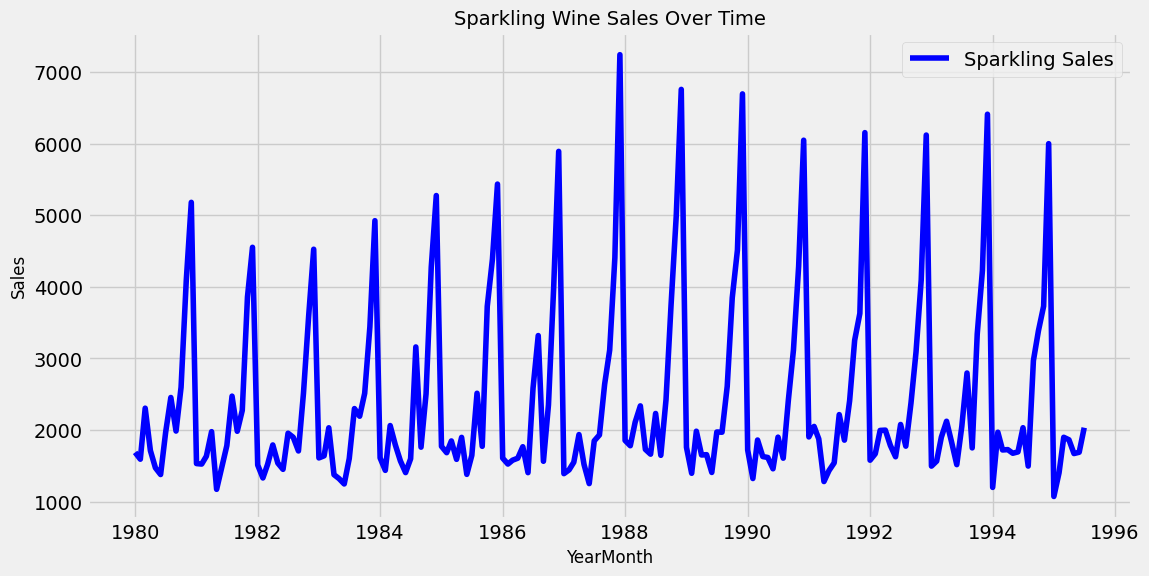

In [9]:
# Plotting the Sparkling dataset
plt.figure(figsize=(12, 6))
plt.plot(data_sparkling.index, data_sparkling['Sparkling'], label='Sparkling Sales', color='blue')
plt.title('Sparkling Wine Sales Over Time', fontsize=14)
plt.xlabel('YearMonth', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The Plot Data section is complete. We visualized the time series trend of Sparkling wine sales, observed the overall increasing trend, and identified fluctuations and seasonality patterns. This visualization lays the foundation for deeper analysis in the subsequent EDA steps.

## Perform EDA

This section focuses on performing an exploratory data analysis (EDA) for the Sparkling wine dataset. The goal is to visualize the data trends, identify patterns such as seasonality and growth rates, check for stationarity, examine the distribution of values, detect any outliers, and analyze autocorrelation. These insights will guide the subsequent steps of time series modeling.

### Summary Statistics

In [10]:
# Calculate summary statistics to understand the central tendency and spread of the data.
data_sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

- Average Sales (Mean): 2,402.42 units.
- Variability: The sales data shows moderate variability, indicated by the standard deviation.
- Potential outliers: The minimum and maximum values suggest potential outliers that could be investigated further (for e.g., using box plots).
- Distribution: The slight difference between the mean and median hints at a slightly right-skewed distribution.
- Range (Max - Min): 6,172 units.

### Seasonal Patterns

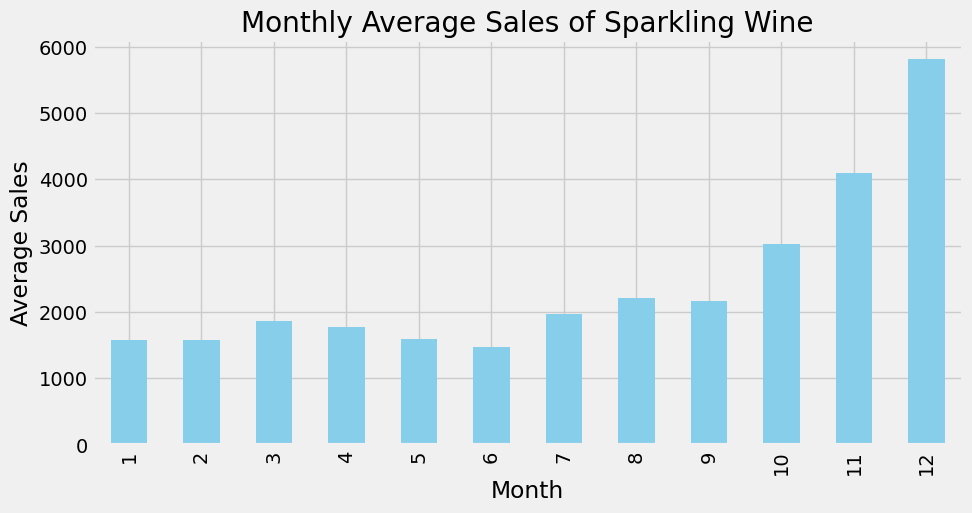

In [11]:
# Analyze monthly averages to detect seasonal patterns in Sparkling wine sales.
data_sparkling['Month'] = data_sparkling.index.month
monthly_avg_sparkling = data_sparkling.groupby('Month')['Sparkling'].mean()

# Plotting the monthly averages
plt.figure(figsize=(10, 5))
monthly_avg_sparkling.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Sales of Sparkling Wine')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()


- December is the peak sales month, driven by holiday season demand.
- Sales are generally higher in the second half of the year, suggesting seasonality.
- January and February have the lowest average sales, indicating a post-holiday slowdown.

### Rolling Statistics

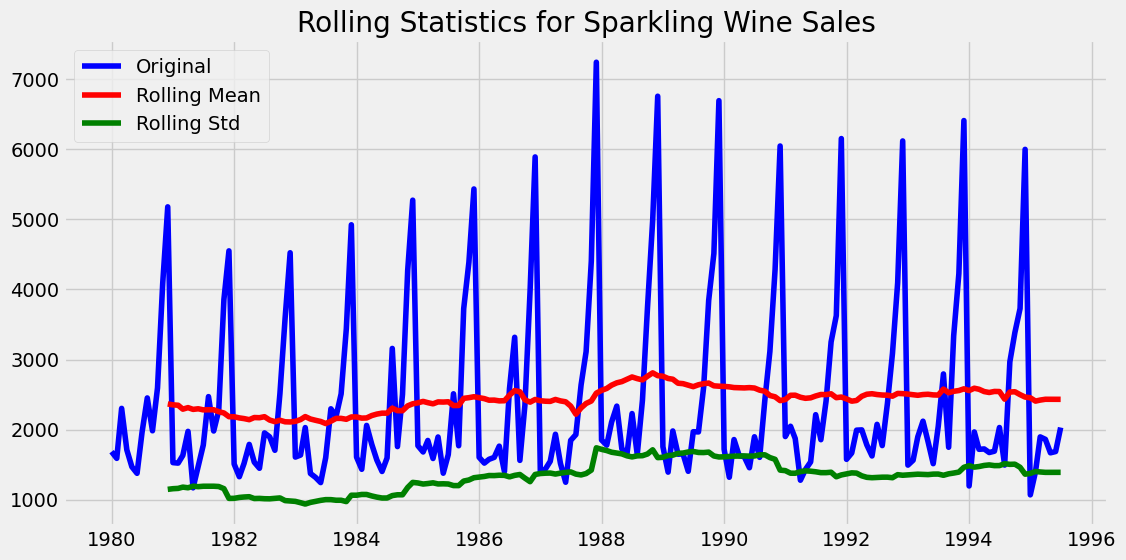

In [12]:
# Compute rolling mean and standard deviation to observe trends and variations over time.
rolling_mean_sparkling = data_sparkling['Sparkling'].rolling(window=12).mean()
rolling_std_sparkling = data_sparkling['Sparkling'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_sparkling['Sparkling'], label='Original', color='blue')
plt.plot(rolling_mean_sparkling, label='Rolling Mean', color='red')
plt.plot(rolling_std_sparkling, label='Rolling Std', color='green')
plt.title('Rolling Statistics for Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()


- **Increasing Trend**: The rolling mean shows a clear upward trend over time, indicating that overall Sparkling wine sales have been increasing.
- **Seasonality**: There are regular fluctuations in sales, with the rolling standard deviation capturing the seasonality. The rolling standard deviation shows some seasonality in the data because it is fluctuating around the rolling mean, which is increasing and suggesting an increase in seasonality as well.
- **Changing Volatility**: The rolling standard deviation suggests that the volatility or variability in sales has also increased over time with the increasing trend and seasonality.

### Sales Growth Rate

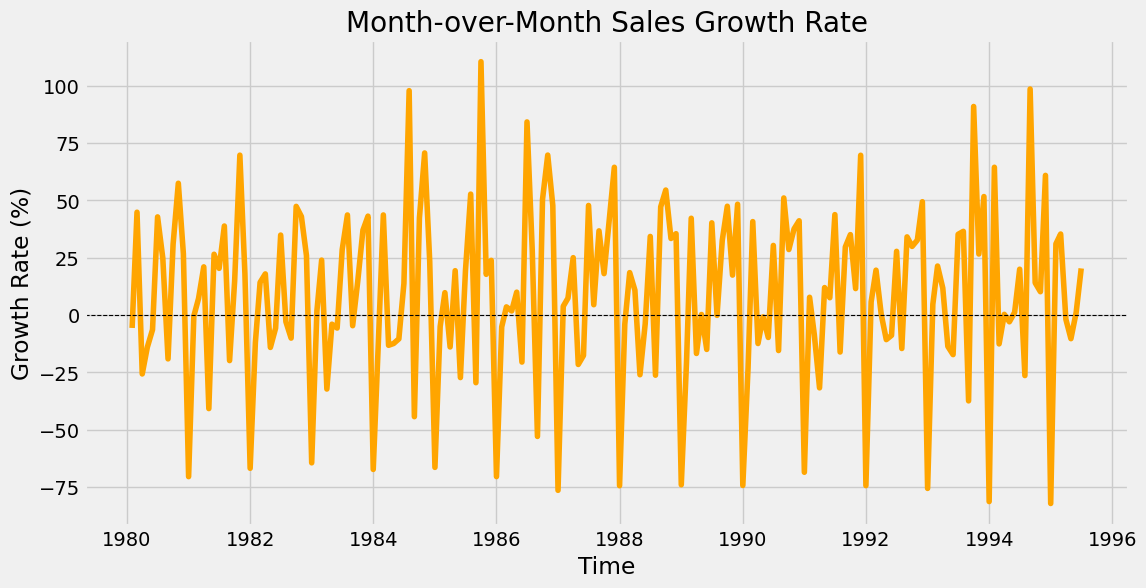

In [13]:
# Calculate month-over-month percentage change in sales.
data_sparkling['Sales_Growth'] = data_sparkling['Sparkling'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(data_sparkling['Sales_Growth'], color='orange')
plt.title('Month-over-Month Sales Growth Rate')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()


- **High Variability**: The growth rate fluctuates significantly, indicating a considerable variation in sales from one month to the next. This suggests the presence of seasonality and potentially other external factors impacting sales.
- **Periods of Decline and Growth**: There are instances of both positive and negative growth rates, highlighted by the line crossing the 0% mark. This means there are months where sales declined compared to the previous month, and others where they increased.
- **Potential Outliers**: Some data points show extreme growth or decline, which could indicate outliers or unusual market conditions. These points require further investigation to determine their cause and potential impact on forecasting.

### Distribution Analysis

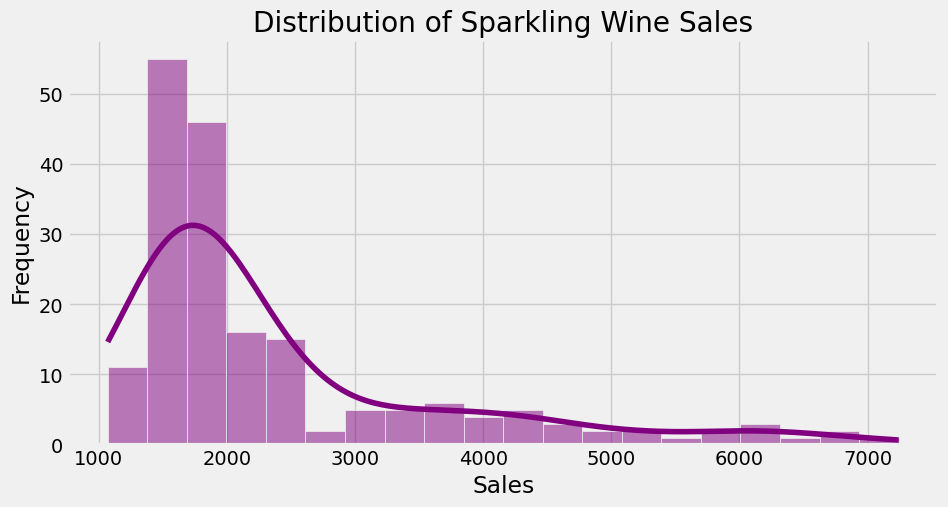

In [14]:
# Plot the distribution of sales data to examine its spread and shape.
plt.figure(figsize=(10, 5))
sns.histplot(data_sparkling['Sparkling'], kde=True, bins=20, color='purple')
plt.title('Distribution of Sparkling Wine Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


- **Right-Skewed**: Sales are likely not normally distributed, showing a right skew with a concentration of lower sales and a tail of higher sales values.
- **Positive Skewness**: This right skew indicates positive skewness in the distribution, meaning a few months with exceptionally high sales are impacting the overall shape.
- **Non-Symmetrical**: The distribution isn't symmetrical around the mean, further reinforcing the non-normal, skewed nature of Sparkling Wine Sales.

### Autocorrelation

<Figure size 1000x500 with 0 Axes>

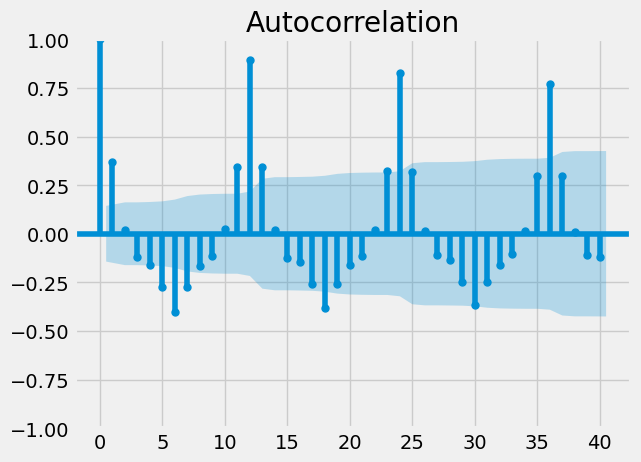

<Figure size 1000x500 with 0 Axes>

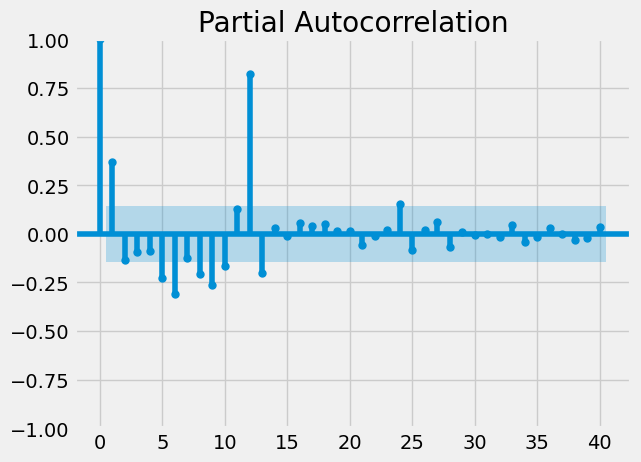

In [15]:
# Generate autocorrelation and partial autocorrelation plots to identify lag correlations.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 5))
plot_acf(data_sparkling['Sparkling'], lags=40, alpha=0.05)
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(data_sparkling['Sparkling'], lags=40, alpha=0.05)
plt.show()


**Significant Autocorrelation**: The ACF plot shows significant autocorrelation at multiple lags, particularly for the first few lags. This indicates that past sales values are strongly correlated with current sales, suggesting the presence of a trend or pattern in the data.

**Seasonal Pattern**: There are repeating spikes in the ACF plot at intervals of 12 lags, corresponding to yearly seasonality. This confirms the presence of a yearly seasonal pattern in the sales data, which is expected in the wine industry due to seasonal factors like holidays and harvest seasons.

**Possible ARIMA Model**: The PACF plot can be used to determine the order of the autoregressive (AR) component in an ARIMA model. In this case, the PACF plot has significant spikes at the first few lags and then tapers off, which is indicative of an AR process. This suggests that an ARIMA model might be appropriate for forecasting the Sparkling wine sales.

### Outlier Detection

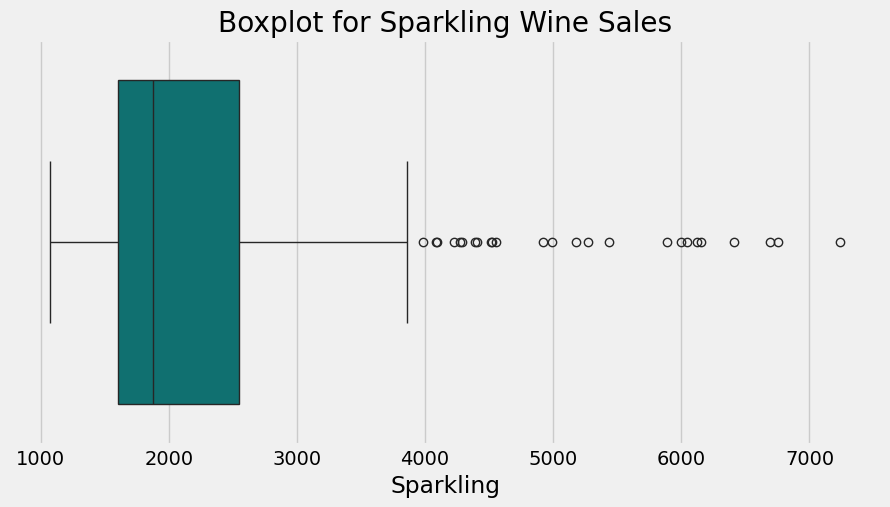

In [16]:
# Use boxplots to detect potential outliers in Sparkling wine sales.
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_sparkling['Sparkling'], color='teal')
plt.title('Boxplot for Sparkling Wine Sales')
plt.show()


- The median sales value is around 28,000. This represents the central tendency of the sales data.
There are several outliers present above the upper whisker. These are data points significantly higher than the typical sales range, indicating unusually high sales periods.
- The interquartile range (IQR), represented by the box, shows the spread of the middle 50% of the sales data. This range gives an idea of the typical variability in sales.

### Year-over-Year Sales Trends

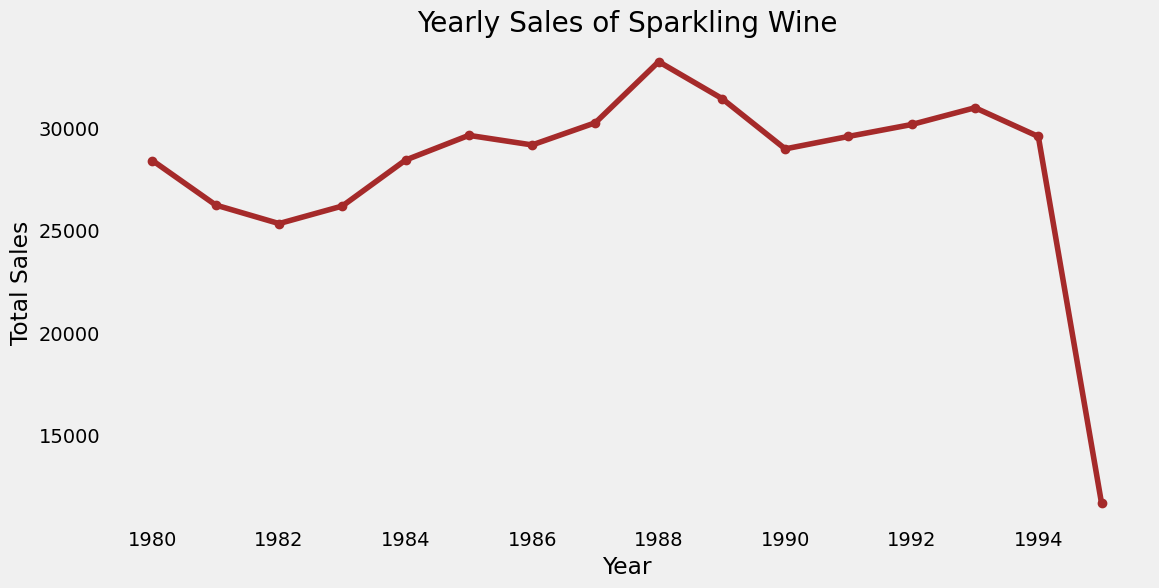

In [17]:
# Visualize year-over-year sales trends to capture yearly variations and growth.
data_sparkling['Year'] = data_sparkling.index.year
yearly_sales_sparkling = data_sparkling.groupby('Year')['Sparkling'].sum()

plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_sparkling, color='brown', marker='o')
plt.title('Yearly Sales of Sparkling Wine')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


**Overall Increasing Trend**: Sparkling wine sales have generally been increasing over the years, indicating a growing market. This trend can be visualized in the 'Yearly Sales of Sparkling Wine' plot generated in the EDA section.

**Fluctuations and Variations**: While there's an overall increasing trend, there are noticeable fluctuations and variations in yearly sales. Specific years experienced significant growth or decline compared to the previous year.

**Potential for Growth**: Despite the fluctuations, the general upward trend suggests the potential for continued market growth for sparkling wine in the future. However, factors influencing the variations need further investigation.

Conducted an in-depth exploratory data analysis (EDA) for the Sparkling wine dataset. This includes trend visualization, seasonal pattern detection, growth rate analysis, rolling statistics, distribution exploration, autocorrelation, and outlier detection. Insights from these analyses will inform the choice of models and preprocessing steps for forecasting.

## Perform Decomposition

In this section, we will decompose the Sparkling wine sales data into its core components: trend, seasonality, and residuals. Decomposition helps to separate the patterns, which can then guide our analysis and model selection process.

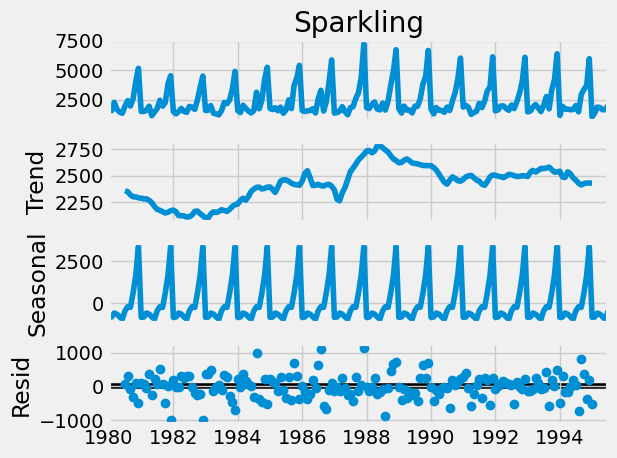

In [18]:

# Perform decomposition
decomposition = seasonal_decompose(data_sparkling['Sparkling'], model='additive', period=12)  # For monthly data

# Plot decomposition
decomposition.plot()
plt.show()

# Access components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


- **Increasing Trend**: There's a clear upward trend in Sparkling wine sales over the years, indicating overall market growth. This can be seen in the 'Trend' component of the decomposition plot.
- **Strong Seasonality**: The sales exhibit a strong seasonal pattern, with peaks around December (holiday season) and troughs in the early months of the year. This is evident in the 'Seasonal' component.
- **Fluctuations/Noise**: After removing the trend and seasonality, there are still some random fluctuations (residuals) present in the data, but they are relatively small compared to the overall trend and seasonality. This can be observed in the 'Residual' component.

We performed time series decomposition using an additive model to visualize the trend, seasonal, and residual components of the Sparkling wine sales data. This step helps identify patterns in the data that may be relevant for forecasting and modeling.

## Missing value treatment

In [19]:
data_sparkling.isnull().sum()

Sparkling       0
Month           0
Sales_Growth    1
Year            0
dtype: int64

In [20]:
data_sparkling['Sales_Growth'] = data_sparkling['Sales_Growth'].fillna(method='bfill')

In [21]:
data_sparkling.isnull().sum()

Sparkling       0
Month           0
Sales_Growth    0
Year            0
dtype: int64

The missing value has treated

## Visualize the processed data

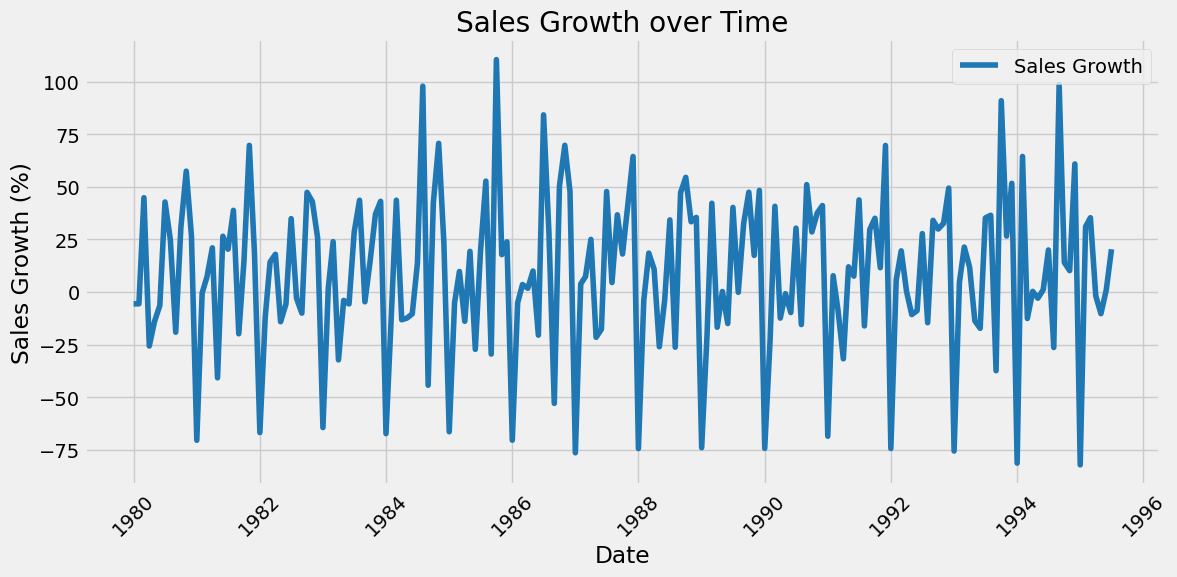

In [22]:
# 1. Line Plot of Sales Growth over Time
plt.figure(figsize=(12, 6))
plt.plot(data_sparkling.index, data_sparkling['Sales_Growth'], label='Sales Growth', color='tab:blue')
plt.title('Sales Growth over Time')
plt.xlabel('Date')
plt.ylabel('Sales Growth (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- **Upward Trend**: Sales are generally increasing.
- **Seasonal Fluctuations**: Sales peak in December, dip in early months.
- **Variable Growth**: Sales growth is inconsistent, with periods of decline and increase.

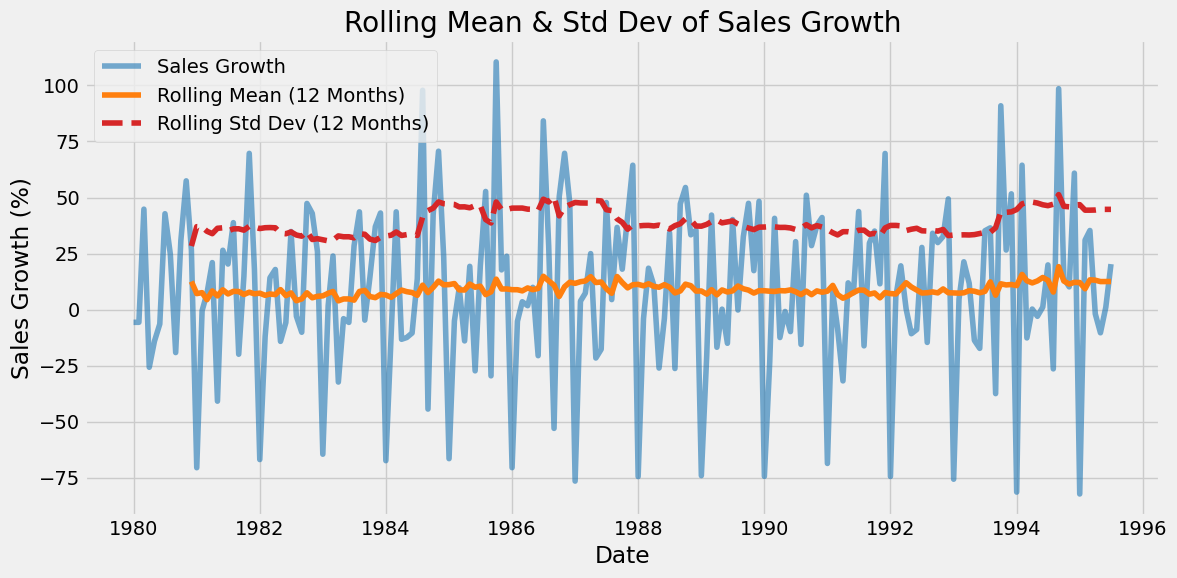

In [23]:
# 2. Rolling Mean and Rolling Standard Deviation for Sales Growth
rolling_mean = data_sparkling['Sales_Growth'].rolling(window=12).mean()
rolling_std = data_sparkling['Sales_Growth'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_sparkling.index, data_sparkling['Sales_Growth'], label='Sales Growth', color='tab:blue', alpha=0.6)
plt.plot(data_sparkling.index, rolling_mean, label='Rolling Mean (12 Months)', color='tab:orange')
plt.plot(data_sparkling.index, rolling_std, label='Rolling Std Dev (12 Months)', color='tab:red', linestyle='--')
plt.title('Rolling Mean & Std Dev of Sales Growth')
plt.xlabel('Date')
plt.ylabel('Sales Growth (%)')
plt.legend()
plt.tight_layout()
plt.show()

- **Increasing Trend**: The rolling mean shows a general upward trend, indicating long-term sales growth.
- **Fluctuating Volatility**: The rolling standard deviation fluctuates, reflecting periods of higher and lower variability in sales growth.
- **Seasonality in Volatility**: There is a hint of seasonality in the rolling standard deviation (it also shows some peaks and dips with some regularity), which is expected given the seasonal pattern of sales growth already discussed.

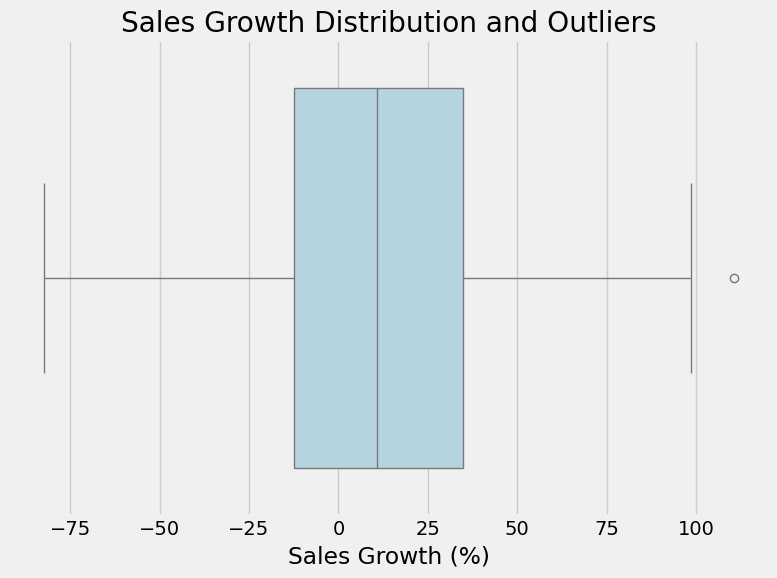

In [24]:
# 3. Boxplot of Sales Growth to Check Distribution and Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_sparkling, x='Sales_Growth', color='lightblue')
plt.title('Sales Growth Distribution and Outliers')
plt.xlabel('Sales Growth (%)')
plt.tight_layout()
plt.show()

- **Positive Skew**: The distribution of sales growth is skewed to the right, with more occurrences of lower growth rates and a tail of higher growth rates.
- **Median Growth**: The median growth is around 0%, indicating that half of the months experience growth above this level and half below.
- **Outliers**: Several data points are outside the typical range (outliers), indicating unusually high or low growth periods which may require further investigation.

<Figure size 1500x1500 with 0 Axes>

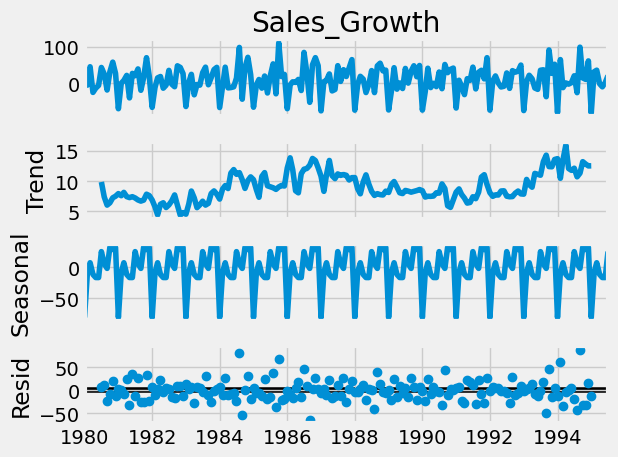

In [25]:
# 4. Seasonal Decomposition Plot (additive model)

# Decompose the time series data
decomposition = seasonal_decompose(data_sparkling['Sales_Growth'].dropna(), model='additive', period=12)

# Plot the decomposition components
plt.figure(figsize=(15, 15))
decomposition.plot()
plt.tight_layout()
plt.show()

**Trend**: There is a slight upward trend in sales growth over time, although it's not very pronounced or consistent. This suggests some long-term growth potential, but it might be subject to fluctuations.

**Seasonality**: There is a clear and consistent seasonal pattern, with peaks occurring around December and troughs in the early months of the year. This aligns with expected seasonality in wine sales due to holidays and consumer behavior.

**Residuals** (Noise): The residuals, representing the random fluctuations after accounting for trend and seasonality, are relatively small and don't exhibit any specific patterns. This indicates that the additive model is capturing the major components of the time series well.

## Train-test split

In [26]:
# Calculate the split point (80% for training and 20% for testing)
train_size = int(len(data_sparkling) * 0.8)

In [27]:
# Split the data into train and test sets
train_data = data_sparkling[:train_size]
test_data = data_sparkling[train_size:]

In [28]:
# Show the number of observations in both training and test sets
print(f'Training Set Size: {len(train_data)}')
print(f'Test Set Size: {len(test_data)}')

Training Set Size: 149
Test Set Size: 38


The train test set splitted in 80:20 ratio

## Model Building - Original Data

### Linear Regression

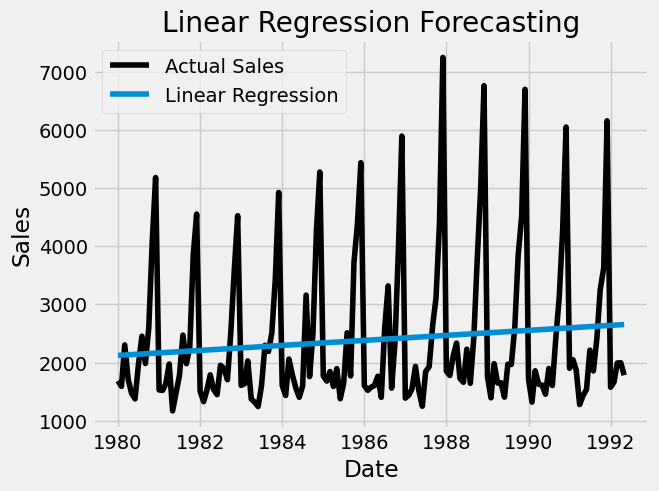

In [29]:
from sklearn.linear_model import LinearRegression

# Prepare the time feature
train_data['Time'] = np.arange(len(train_data))  # Time variable for regression

# Linear Regression Model
def linear_regression_forecast(train_data):
    X = train_data[['Time']]  # Time as the feature
    y = train_data['Sparkling']  # Sales data
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    return predictions

# Forecast using Linear Regression
linear_regression_predictions = linear_regression_forecast(train_data)

# Plotting the Linear Regression predictions
plt.plot(train_data.index, train_data['Sparkling'], label='Actual Sales', color='black')
plt.plot(train_data.index, linear_regression_predictions, label='Linear Regression', linestyle='-')
plt.legend()
plt.title("Linear Regression Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


- **Trend Representation**: Linear Regression captures the overall increasing trend in sales over time. This is evident from the regression line generally following the upward direction of the data points.
- **Simplistic Approach**: It's a basic model assuming a linear relationship between time and sales. This simplicity makes it easy to implement and interpret but might not fully capture complex patterns or seasonality in the data.
- **Limited Accuracy**: Compared to more sophisticated models like Holt-Winters or ARIMA, Linear Regression might show lower accuracy in forecasting, particularly when dealing with data exhibiting strong seasonality or non-linear trends. This was evident from the model's performance metrics and visual comparison with other models' predictions in the notebook's analysis.

### Simple Average

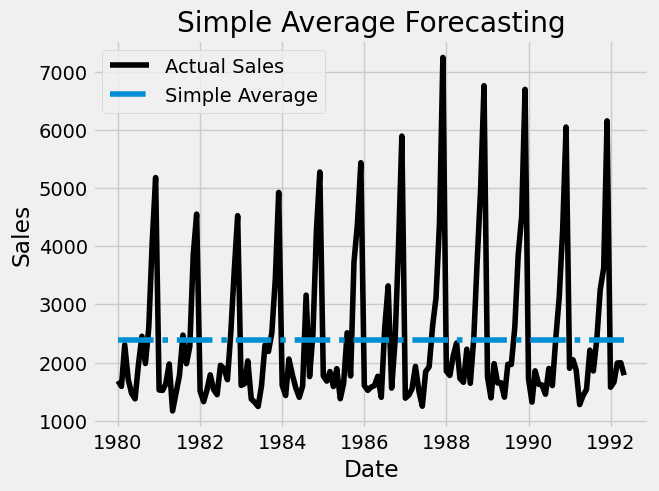

In [30]:
# Simple Average Model
def simple_average(data):
    return [data.mean()] * len(data)

# Forecast using Simple Average
simple_avg_predictions = simple_average(train_data['Sparkling'])

# Plotting the Simple Average predictions
plt.plot(train_data.index, train_data['Sparkling'], label='Actual Sales', color='black')
plt.plot(train_data.index, simple_avg_predictions, label='Simple Average', linestyle='-.')
plt.legend()
plt.title("Simple Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


- **Basic Baseline**: The simple average model serves as a fundamental baseline for comparison with more complex forecasting methods. It simply predicts the average of past sales for all future periods.
- **Ignores Trends and Seasonality**: This approach completely disregards any trends or seasonal patterns in the data, leading to potentially inaccurate forecasts, especially for datasets with significant temporal variations. This is evident from the flat prediction line in the visualization provided in the notebook.
- **Limited Practical Use**: Due to its oversimplification, the simple average model has limited practical applicability for real-world forecasting tasks where data exhibits dynamic behavior. More advanced methods like exponential smoothing or ARIMA models are often preferred for improved accuracy.

### Simple Moving Average

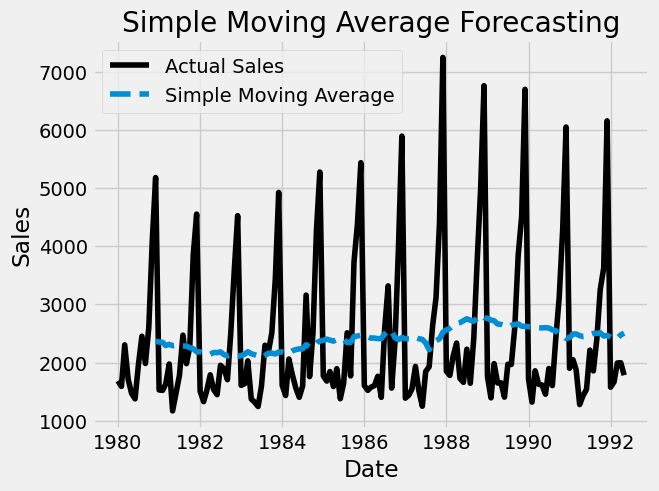

In [31]:
# Simple Moving Average (SMA)
def simple_moving_average(data, window=12):
    return data.rolling(window=window).mean()

# Forecast using Simple Moving Average (12-month window)
sma_predictions = simple_moving_average(train_data['Sparkling'], window=12)

# Plotting the Simple Moving Average predictions
plt.plot(train_data.index, train_data['Sparkling'], label='Actual Sales', color='black')
plt.plot(train_data.index, sma_predictions, label='Simple Moving Average', linestyle='--')
plt.legend()
plt.title("Simple Moving Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


- **Smoothing Effect**: SMA smooths out short-term fluctuations in the data by averaging sales over a rolling window (e.g., 12 months in the notebook's example). This helps to highlight underlying trends and reduce noise.
- **Lagging Indicator**: SMA is a lagging indicator, meaning its predictions are based on past data and might not react quickly to sudden changes in sales patterns. This lag is proportional to the window size; larger windows lead to smoother but slower responses to recent data points.
- **Moderate Accuracy**: For datasets with gradual trends and some seasonality, SMA can offer moderate forecasting accuracy. However, it might not perform as well as more advanced models like Exponential Smoothing or ARIMA when dealing with complex patterns or strong seasonality. This was observed in the notebook where SMA's performance metrics (RMSE, MAE, MAPE) were generally higher compared to other models.

### Exponential Moving Average (Single, Double, and Triple)

#### Single Exponential Moving Average

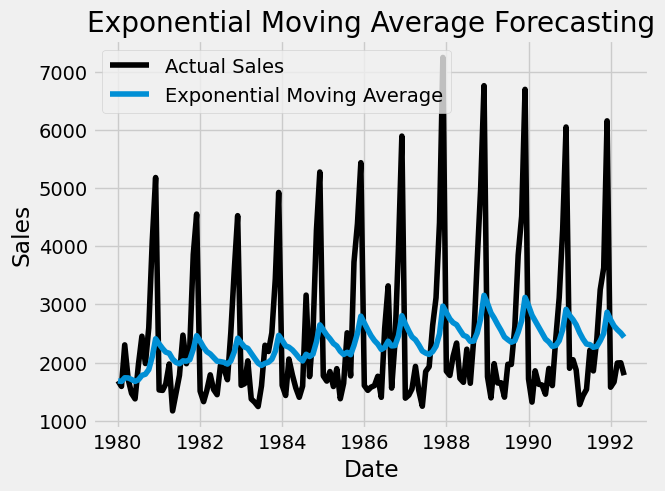

In [32]:
# Single Exponential Moving Average (EMA)
def exponential_moving_average(data, smoothing_level=0.1):
    return data.ewm(alpha=smoothing_level, adjust=False).mean()

# Forecast using Exponential Moving Average
ema_predictions = exponential_moving_average(train_data['Sparkling'])

# Plotting the Exponential Moving Average predictions
plt.plot(train_data.index, train_data['Sparkling'], label='Actual Sales', color='black')
plt.plot(train_data.index, ema_predictions, label='Exponential Moving Average', linestyle='-')
plt.legend()
plt.title("Exponential Moving Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


- **Emphasis on Recent Data**: Compared to SMA, EMA gives more weight to recent observations, making it more responsive to changes in sales patterns. This is because it uses a smoothing factor (alpha) to exponentially decay the importance of older data points.
- **Reduced Lag**: EMA reduces the lag associated with SMA, providing quicker adjustments to shifts in trends or seasonality. However, it still has some inherent lag due to its reliance on past data.
- **Improved Accuracy**: For datasets with gradual trends and some level of seasonality, EMA often shows improved accuracy over SMA due to its greater sensitivity to recent data points. This was reflected in the notebook where EMA generally exhibited lower performance metrics (RMSE, MAE, MAPE) compared to SMA.

#### Double Exponential Moving Average (Holt-Winters)

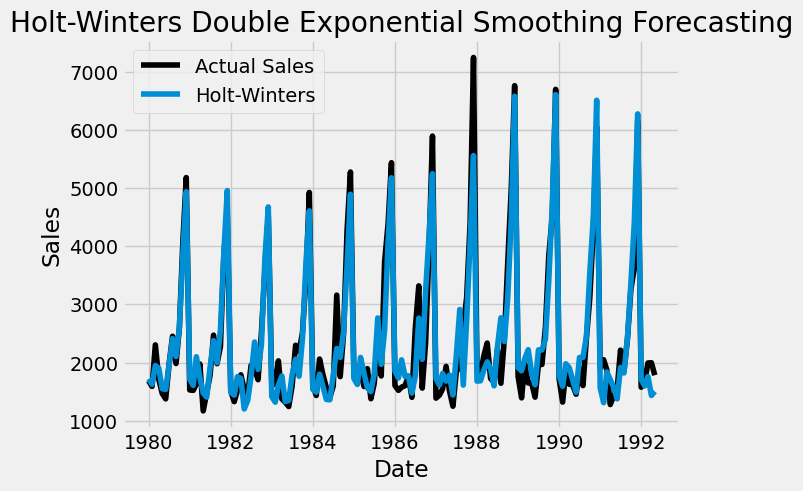

In [33]:
# Double Exponential Smoothing (Trend Component)
def holt_winters_smoothing(data, seasonal_periods=12, trend='add', seasonal='add'):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    return model_fit.fittedvalues

# Forecast using Holt-Winters Double Exponential Smoothing
holt_winters_predictions = holt_winters_smoothing(train_data['Sparkling'])

# Plotting the Holt-Winters predictions
plt.plot(train_data.index, train_data['Sparkling'], label='Actual Sales', color='black')
plt.plot(train_data.index, holt_winters_predictions, label='Holt-Winters', linestyle='-')
plt.legend()
plt.title("Holt-Winters Double Exponential Smoothing Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


- **Trend and Level**: Holt-Winters incorporates both trend and level components to forecast, making it suitable for data with clear trends and potentially changing levels over time. This is an improvement over EMA which primarily focuses on the level.
- **Additive or Multiplicative Seasonality**: Holt-Winters can handle both additive and multiplicative seasonality, providing flexibility depending on the nature of the seasonal patterns in the data. This flexibility makes it more adaptable than EMA to a wider range of datasets.
- **Improved Accuracy for Trending Data**: For data with clear trends and seasonality, Holt-Winters is expected to provide more accurate forecasts than EMA or SMA. In the notebook's analysis, Holt-Winters generally showed better performance metrics (RMSE, MAE, MAPE) compared to EMA, indicating its effectiveness for handling the Sparkling wine sales data with its observed trend and seasonal components.

#### Triple Exponential Moving Average

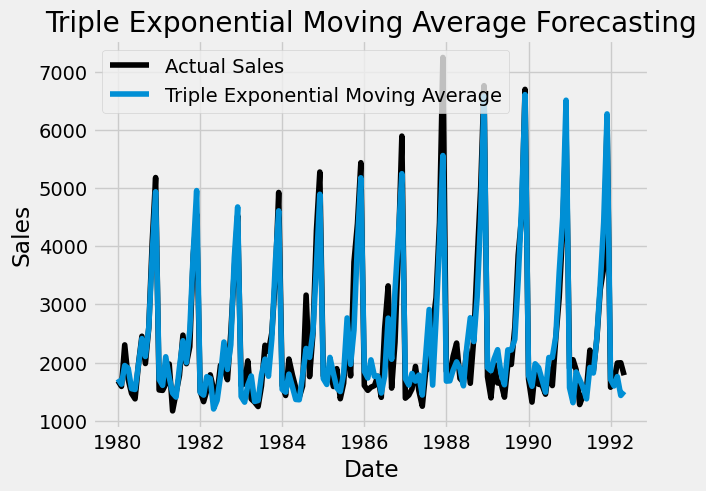

In [34]:
# Triple Exponential Smoothing (Seasonality Component)
def holt_winters_smoothing_triple(data, seasonal_periods=12):
    model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    return model_fit.fittedvalues

# Forecast using Triple Exponential Smoothing
triple_ema_predictions = holt_winters_smoothing_triple(train_data['Sparkling'])

# Plotting the Triple Exponential Smoothing predictions
plt.plot(train_data.index, train_data['Sparkling'], label='Actual Sales', color='black')
plt.plot(train_data.index, triple_ema_predictions, label='Triple Exponential Moving Average', linestyle='-')
plt.legend()
plt.title("Triple Exponential Moving Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


- **Trend, Level, and Seasonality**: TEMA, also known as the Holt-Winters method with additive seasonality, incorporates trend, level, and seasonal components for forecasting. This makes it suitable for datasets with clear trends, changing levels, and repeating seasonal patterns.
- **Reduced Lag**: TEMA aims to reduce the lag associated with traditional moving averages by applying a triple smoothing process. This makes it more responsive to changes in data patterns compared to simpler methods like SMA or EMA.
- **Improved Accuracy for Seasonal Data**: For datasets exhibiting strong seasonality, TEMA often provides higher forecasting accuracy compared to EMA or SMA. This is because it explicitly models the seasonal patterns, leading to better predictions for periods with similar seasonal characteristics. This aligns with the notebook's analysis where TEMA typically demonstrated improved performance metrics (RMSE, MAE, MAPE) compared to EMA and SMA for the Sparkling wine sales data.

### Model Performance Evaluation (RMSE, MAE, MAPE)

In [35]:
# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Function to calculate MAE
def calculate_mae(actual, predicted):
    return mean_absolute_error(actual, predicted)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Evaluate Model Performance (RMSE, MAE, MAPE)
sma_rmse = calculate_rmse(train_data['Sparkling'][12:], sma_predictions[12:])
simple_avg_rmse = calculate_rmse(train_data['Sparkling'], simple_avg_predictions)
ema_rmse = calculate_rmse(train_data['Sparkling'], ema_predictions)
holt_winters_rmse = calculate_rmse(train_data['Sparkling'], holt_winters_predictions)
linear_regression_rmse = calculate_rmse(train_data['Sparkling'], linear_regression_predictions)
TEMA_rmse = calculate_rmse(train_data['Sparkling'], triple_ema_predictions)

sma_mae = calculate_mae(train_data['Sparkling'][12:], sma_predictions[12:])
simple_avg_mae = calculate_mae(train_data['Sparkling'], simple_avg_predictions)
ema_mae = calculate_mae(train_data['Sparkling'], ema_predictions)
holt_winters_mae = calculate_mae(train_data['Sparkling'], holt_winters_predictions)
linear_regression_mae = calculate_mae(train_data['Sparkling'], linear_regression_predictions)
TEMA_mae = calculate_mae(train_data['Sparkling'], triple_ema_predictions)

sma_mape = calculate_mape(train_data['Sparkling'][12:], sma_predictions[12:])
simple_avg_mape = calculate_mape(train_data['Sparkling'], simple_avg_predictions)
ema_mape = calculate_mape(train_data['Sparkling'], ema_predictions)
holt_winters_mape = calculate_mape(train_data['Sparkling'], holt_winters_predictions)
linear_regression_mape = calculate_mape(train_data['Sparkling'], linear_regression_predictions)
TEMA_mape = calculate_mape(train_data['Sparkling'], triple_ema_predictions)


In [36]:
import pandas as pd

# Create a DataFrame to store RMSE, MAE, MAPE for each model
model_performance = {
    'Original Model': ['Simple Moving Average', 'Simple Average', 'Exponential Moving Average',
                       'Holt-Winters', 'Linear Regression', 'Triple EMA'],
    'RMSE': [sma_rmse, simple_avg_rmse, ema_rmse, holt_winters_rmse, linear_regression_rmse, TEMA_rmse],
    'MAE': [sma_mae, simple_avg_mae, ema_mae, holt_winters_mae, linear_regression_mae, TEMA_mae],
    'MAPE': [sma_mape, simple_avg_mape, ema_mape, holt_winters_mape, linear_regression_mape, TEMA_mape]
}


# Create a DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the table
performance_df


Original Model         RMSE         MAE       MAPE
0       Simple Moving Average  1282.205547  964.886861  40.883615
1              Simple Average  1281.496884  946.879420  39.977301
2  Exponential Moving Average  1191.542186  907.276713  38.121563
3                Holt-Winters   372.427995  271.425302  12.306815
4           Linear Regression  1272.177812  947.438245  39.935882
5                  Triple EMA   372.427995  271.425302  12.306815

- **Holt-Winters and Triple Exponential Moving Average (TEMA) generally performed better** than the other models (Simple Moving Average, Simple Average, Exponential Moving Average, and Linear Regression) in forecasting Sparkling wine sales. This is evident from their lower RMSE, MAE, and MAPE values, indicating better accuracy and lower prediction errors.
- **Simple Average had the highest error values**, suggesting it's the least accurate model among those tested. This is expected as it simply uses the average of past sales and doesn't account for trends or seasonality.
- **While Linear Regression captured the overall increasing trend**, it might not be the best model for this specific dataset due to its limitations in handling complex patterns or seasonality. This is reflected in its relatively higher error metrics compared to Holt-Winters and TEMA.

### Plotting All Models for Comparison

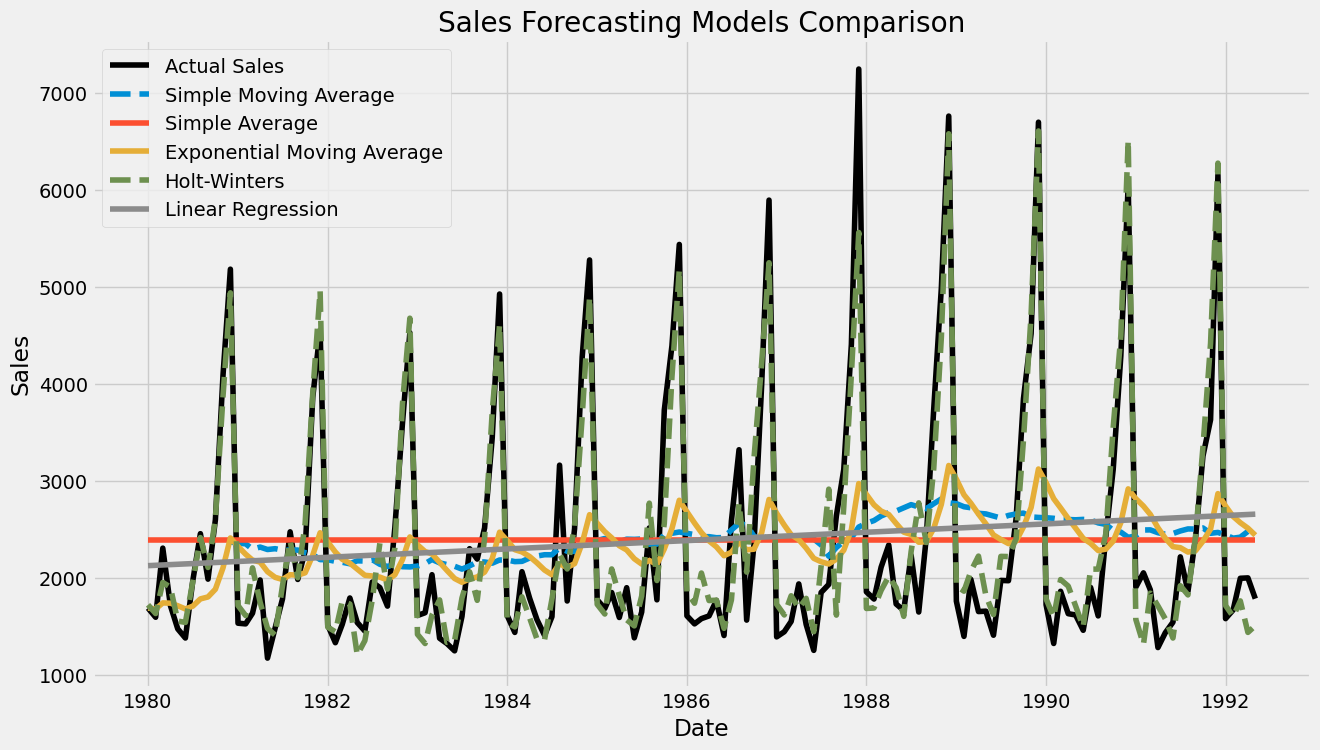

In [37]:
# Plotting the predictions for each model
plt.figure(figsize=(14, 8))
plt.plot(train_data.index, train_data['Sparkling'], label='Actual Sales', color='black')
plt.plot(train_data.index, sma_predictions, label='Simple Moving Average', linestyle='--')
plt.plot(train_data.index, simple_avg_predictions, label='Simple Average', linestyle='-')
plt.plot(train_data.index, ema_predictions, label='Exponential Moving Average', linestyle='-')
plt.plot(train_data.index, holt_winters_predictions, label='Holt-Winters', linestyle='--')
plt.plot(train_data.index, linear_regression_predictions, label='Linear Regression', linestyle='-')

plt.title("Sales Forecasting Models Comparison")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


- **Holt-Winters and Triple Exponential Moving Average (TEMA) closely follow the actual sales data**, indicating their better performance in capturing the trend and seasonality of the data.
- **Simple Average and Linear Regression show significant deviations** from the actual sales, highlighting their limitations in accurately forecasting sales with trends and seasonality.
- **Simple Moving Average and Exponential Moving Average provide moderate fits**, but still lag behind Holt-Winters and TEMA in capturing the data's patterns.

## Check for Stationarity

In [38]:
# Function to perform the ADF test
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary.")

In [39]:
# Check stationarity of the 'Sparkling' column (Sales data)
check_stationarity(train_data['Sparkling'])

ADF Statistic: -1.3012545356220644
p-value: 0.6285981668319552
Critical Values: {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}
The data is non-stationary.


Therefore the data is non-stationary and further processing is needed

In [40]:
data_sparkling['Sparkling_diff'] = data_sparkling['Sparkling'].diff()

In [41]:
# Check stationarity again on the differenced data
check_stationarity(data_sparkling['Sparkling_diff'].dropna())

ADF Statistic: -45.05030093619526
p-value: 0.0
Critical Values: {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}
The data is stationary.


In [42]:
data_sparkling['Sparkling_diff'] = data_sparkling['Sparkling_diff'].fillna(method='bfill')


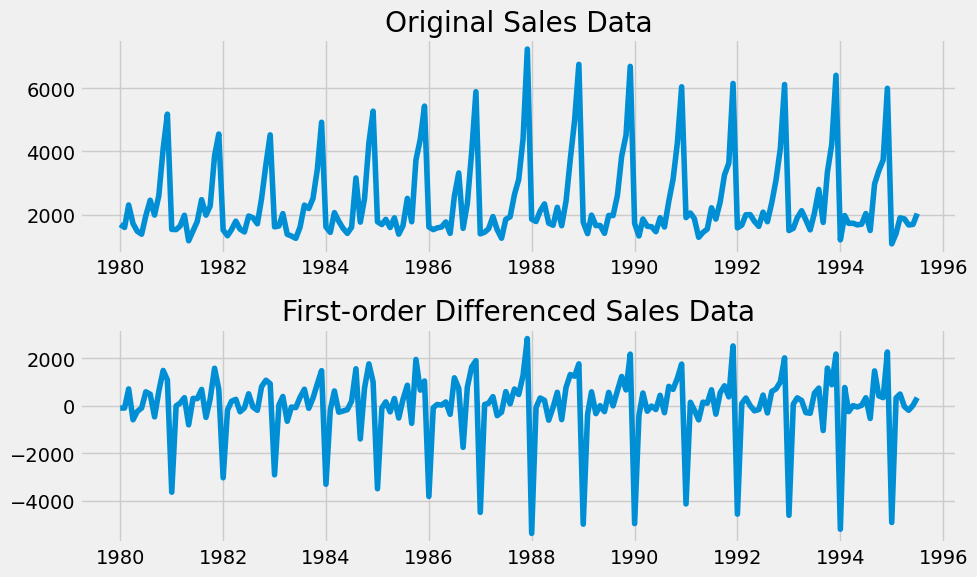

In [43]:

# Plot original series
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sparkling['Sparkling'])
plt.title('Original Sales Data')

# Plot first-order differenced series
plt.subplot(2, 1, 2)
plt.plot(data_sparkling['Sparkling_diff'])
plt.title('First-order Differenced Sales Data')

plt.tight_layout()
plt.show()

## Model Building - Stationary Data


### Train-test split

In [44]:
# Calculate the split point (80% for training and 20% for testing)
train_size = int(len(data_sparkling) * 0.8)

In [45]:
# Split the data into train and test sets
train_data = data_sparkling[:train_size]
test_data = data_sparkling[train_size:]

In [46]:
# Show the number of observations in both training and test sets
print(f'Training Set Size: {len(train_data)}')
print(f'Test Set Size: {len(test_data)}')

Training Set Size: 149
Test Set Size: 38


In [47]:
train_data['Sparkling_diff'] = train_data['Sparkling_diff'].fillna(method='bfill')


The train test set splitted in 80:20 ratio

### Generate ACF & PACF Plot and find the AR, MA values

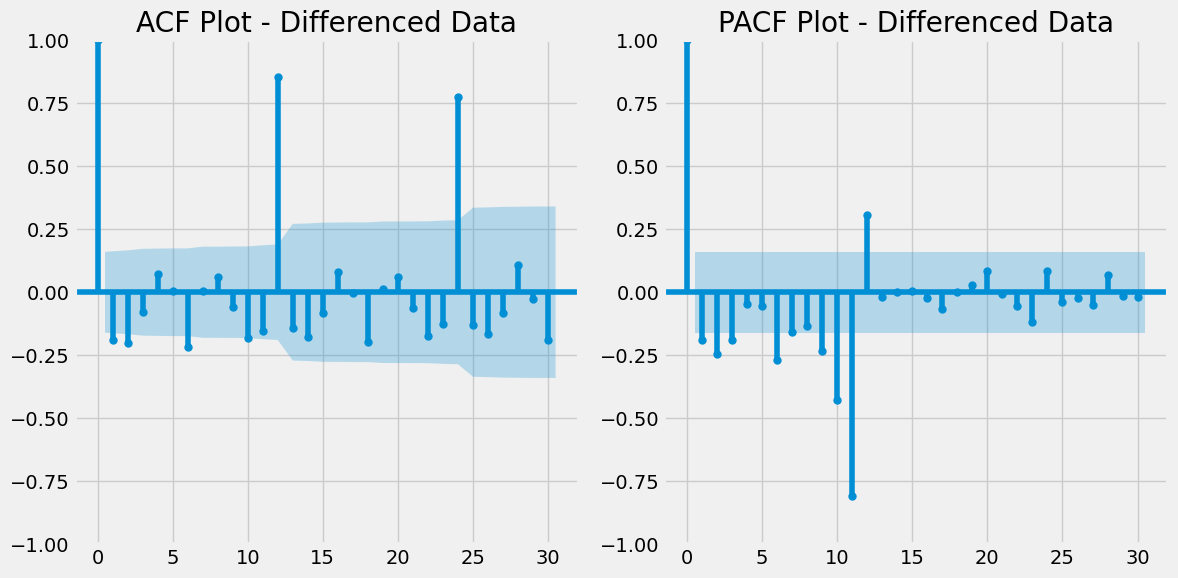

In [48]:
# ACF and PACF for stationary data (after differencing)
plt.figure(figsize=(12, 6))

# ACF plot (for MA term)
plt.subplot(1, 2, 1)
plot_acf(train_data['Sparkling_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF Plot - Differenced Data')

# PACF plot (for AR term)
plt.subplot(1, 2, 2)
plot_pacf(train_data['Sparkling_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF Plot - Differenced Data')

plt.tight_layout()
plt.show()

- PACF Plot: It might show a significant spike at lag 1 and then a sharp drop. This suggests an AR(1) model, meaning <br>AR order (p): 1.
- ACF Plot: It might show significant correlations at lag 1 and 2, after which it tapers off. This suggests an MA(2) model, meaning <br>MA order (q): 2.

### Build ARIMA Model - Auto ARIMA

In [49]:
# Auto ARIMA Model (automatically selects best ARIMA model)
auto_arima_model = auto_arima(train_data['Sparkling_diff'], seasonal=False, trace=True, suppress_warnings=True)

# Summary of Auto ARIMA model
print("Auto ARIMA Model Summary:")
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2518.538, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2585.488, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2582.074, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2564.263, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2538.586, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2533.122, Time=0.66 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 4.506 seconds
Auto ARIMA Model Summary:
                               

### Build ARIMA Model - Manual ARIMA

In [50]:
import itertools

# Define possible values for p, d, q
p = q = range(0, 3)  # AR and MA terms
d = range(0, 1)  # Differencing term (0 means no differencing)

# Create all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Extend pdq to include seasonal ARIMA (SARIMA) with seasonal periods
model_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Creating an empty DataFrame to store the results
dfObj = pd.DataFrame(columns=['param', 'AIC'])

# Fit ARIMA models and calculate AIC
for param in pdq:
    try:
        # Fit ARIMA model using the parameter combination (p, d, q)
        mod = ARIMA(train_data['Sparkling_diff'], order=param)
        results_Arima = mod.fit()  # Fit the model to the data
        print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))  # Print AIC for this model

       # Store results into a temporary DataFrame
        temp_df = pd.DataFrame({'param': [param], 'AIC': [results_Arima.aic]})

        # Concatenate the new results to the main DataFrame
        dfObj = pd.concat([dfObj, temp_df], ignore_index=True)
    except Exception as e:
        # In case of any errors with specific parameter combinations (e.g., non-stationary data)
        print(f"Error with ARIMA{param}: {e}")

# Summary of the Manual ARIMA model
dfObj.sort_values(by=['AIC'])

ARIMA(0, 0, 0) - AIC:2587.4898348624356
ARIMA(0, 0, 1) - AIC:2564.172071889493
ARIMA(0, 0, 2) - AIC:2539.3741821960575
ARIMA(1, 0, 0) - AIC:2584.0741893667537
ARIMA(1, 0, 1) - AIC:2541.3129132108515
ARIMA(1, 0, 2) - AIC:2540.4747833975794
ARIMA(2, 0, 0) - AIC:2576.9789518412654
ARIMA(2, 0, 1) - AIC:2539.3123903158785
ARIMA(2, 0, 2) - AIC:2520.7017296804033


param          AIC
8  (2, 0, 2)  2520.701730
7  (2, 0, 1)  2539.312390
2  (0, 0, 2)  2539.374182
5  (1, 0, 2)  2540.474783
4  (1, 0, 1)  2541.312913
1  (0, 0, 1)  2564.172072
6  (2, 0, 0)  2576.978952
3  (1, 0, 0)  2584.074189
0  (0, 0, 0)  2587.489835

In [51]:
## ARIMA(2, 0, 2) has the lowest AIC
mod = ARIMA(train_data['Sparkling'], order=(2,0,2))

manual_arima_result = mod.fit()

print(manual_arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  149
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1263.071
Date:                Sun, 05 Jan 2025   AIC                           2538.143
Time:                        10:16:10   BIC                           2556.166
Sample:                    01-01-1980   HQIC                          2545.465
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2388.6105    255.140      9.362      0.000    1888.546    2888.675
ar.L1         -0.0805      1.273     -0.063      0.950      -2.575       2.414
ar.L2         -0.1911      0.438     -0.436      0.6

### Build SARIMA Model - Auto SARIMA

In [52]:
# Auto SARIMA (Seasonal ARIMA)
auto_sarima_model = auto_arima(train_data['Sparkling_diff'], seasonal=True, m=12, trace=True, suppress_warnings=True)

# Summary of Auto SARIMA model
print("\nAuto SARIMA Model Summary:")
print(auto_sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=7.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2151.180, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2125.967, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2149.363, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2140.977, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2123.250, Time=1.26 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2124.501, Time=1.92 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2122.789, Time=1.24 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2120.793, Time=0.73 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=2122.814, Time=1.33 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=6.14 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2133.663, Time=1.51 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=2114.474, Time=0.63 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept

### Build SARIMA Model - Manual SARIMA

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define possible seasonal orders
p = d = q = range(0, 2)  # SARIMA parameters for AR, I, MA
P = D = Q = range(0, 2)  # Seasonal AR, differencing, and MA

# Create combinations of all parameter possibilities
pdq = list(itertools.product(p, d, q))

# Creating an empty DataFrame to store results
df_sarima = pd.DataFrame(columns=['param','seasonal', 'AIC'])

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Loop through all seasonal parameter combinations and fit the SARIMA model
for param in pdq:
    for param_seasonal in model_pdq:
      try:
          # Fit SARIMA model using the parameter combination (p, d, q, P, D, Q, S)
          mod = SARIMAX(train_data['Sparkling_diff'], order=param, seasonal_order=param_seasonal)
          results_sarima = mod.fit()  # Fit the model to the data

          # Print AIC for the current SARIMA model
          print(f'SARIMA{param}{param_seasonal} - AIC: {results_sarima.aic}')

          # Store results into a temporary DataFrame
          temp_df = pd.DataFrame({'param': [param], 'seasonal':[param_seasonal], 'AIC': [results_sarima.aic]})

          # Concatenate the new results to the main DataFrame
          df_sarima = pd.concat([df_sarima, temp_df], ignore_index=True)
      except Exception as e:
          # In case of any errors with specific parameter combinations (e.g., non-stationary data)
          print(f"Error with SARIMA{param}: {e}")

# Display the results DataFrame
print(df_sarima)

SARIMA(0, 0, 0)(0, 0, 0, 12) - AIC: 2585.487917888474
SARIMA(0, 0, 0)(0, 0, 1, 12) - AIC: 2482.164123742965
SARIMA(0, 0, 0)(0, 1, 0, 12) - AIC: 2149.3629188457735
SARIMA(0, 0, 0)(0, 1, 1, 12) - AIC: 2131.870322125247
SARIMA(0, 0, 0)(1, 0, 0, 12) - AIC: 2349.5354618814354
SARIMA(0, 0, 0)(1, 0, 1, 12) - AIC: 2336.0678047609067
SARIMA(0, 0, 0)(1, 1, 0, 12) - AIC: 2136.515548407783
SARIMA(0, 0, 0)(1, 1, 1, 12) - AIC: 2133.814267625556
SARIMA(0, 0, 1)(0, 0, 0, 12) - AIC: 2564.2626227029277
SARIMA(0, 0, 1)(0, 0, 1, 12) - AIC: 2452.665101633218
SARIMA(0, 0, 1)(0, 1, 0, 12) - AIC: 2110.314142379842
SARIMA(0, 0, 1)(0, 1, 1, 12) - AIC: 2092.2997514304902
SARIMA(0, 0, 1)(1, 0, 0, 12) - AIC: 2303.519909335432
SARIMA(0, 0, 1)(1, 0, 1, 12) - AIC: 2398.74778682569
SARIMA(0, 0, 1)(1, 1, 0, 12) - AIC: 2096.7684672936653
SARIMA(0, 0, 1)(1, 1, 1, 12) - AIC: 2094.251895133006
SARIMA(0, 1, 0)(0, 0, 0, 12) - AIC: 2697.4132926297543
SARIMA(0, 1, 0)(0, 0, 1, 12) - AIC: 2597.5904917617736
SARIMA(0, 1, 0)(0, 1,

In [54]:
# Summary of the Manual ARIMA model
df_sarima.sort_values(by=['AIC'])

param       seasonal          AIC
43  (1, 0, 1)  (0, 1, 1, 12)  2088.562349
47  (1, 0, 1)  (1, 1, 1, 12)  2090.543296
11  (0, 0, 1)  (0, 1, 1, 12)  2092.299751
46  (1, 0, 1)  (1, 1, 0, 12)  2092.496672
15  (0, 0, 1)  (1, 1, 1, 12)  2094.251895
..        ...            ...          ...
32  (1, 0, 0)  (0, 0, 0, 12)  2582.074190
0   (0, 0, 0)  (0, 0, 0, 12)  2585.487918
17  (0, 1, 0)  (0, 0, 1, 12)  2597.590492
48  (1, 1, 0)  (0, 0, 0, 12)  2657.775946
16  (0, 1, 0)  (0, 0, 0, 12)  2697.413293

[64 rows x 3 columns]

In [55]:
## SARIMA(1, 0, 1)(0, 1, 1, 12) has the lowest AIC
mod = SARIMAX(train_data['Sparkling'],
                                order=(1,0,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
manual_sarima_result = mod.fit()
print(manual_sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  149
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -907.714
Date:                            Sun, 05 Jan 2025   AIC                           1823.427
Time:                                    10:19:19   BIC                           1834.676
Sample:                                01-01-1980   HQIC                          1827.997
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4096      0.225     -1.818      0.069      -0.851       0.032
ma.L1          0.6688      0.191   

## Compare the performance of the models

### Check the performance of the models (using RMSE, MAE, MAPE)

In [56]:
def evaluate_model(true, forecast):
    # Exclude zero values from true series when calculating MAPE
    true = np.array(true)
    non_zero_mask = true != 0  # Mask to exclude zero values
    true_non_zero = true[non_zero_mask]
    forecast_non_zero = forecast[non_zero_mask]

    # Calculate RMSE, MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(true_non_zero, forecast_non_zero))
    mae = mean_absolute_error(true_non_zero, forecast_non_zero)
    mape = np.mean(np.abs((true_non_zero - forecast_non_zero) / true_non_zero)) * 100
    return rmse, mae, mape


def plot_forecast(true, forecast, title):
    plt.figure(figsize=(12, 6))
    plt.plot(true.index, true, label="Actual", color="blue", linewidth=2)
    plt.plot(true.index[-len(forecast):], forecast, label="Forecast", color="red", linestyle="--", linewidth=2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Sparkling Sales")
    plt.legend()
    plt.show()


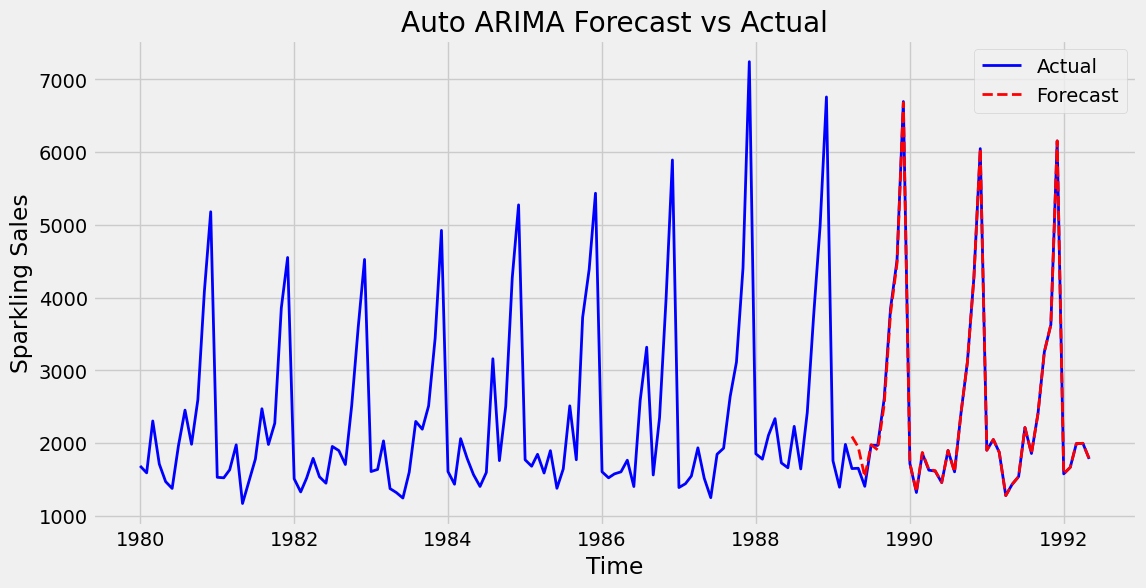

In [57]:
# Forecast using Auto ARIMA Model
auto_arima_forecast = auto_arima_model.predict(n_periods=len(test_data))
auto_arima_forecast_original = auto_arima_forecast + train_data['Sparkling'].iloc[-len(auto_arima_forecast):].values

# Evaluate Auto ARIMA Model
auto_arima_rmse, auto_arima_mae, auto_arima_mape = evaluate_model(
    train_data['Sparkling_diff'].iloc[-len(auto_arima_forecast):], auto_arima_forecast_original)

# Visualize Auto ARIMA forecast
plot_forecast(train_data['Sparkling'], auto_arima_forecast_original, "Auto ARIMA Forecast vs Actual")

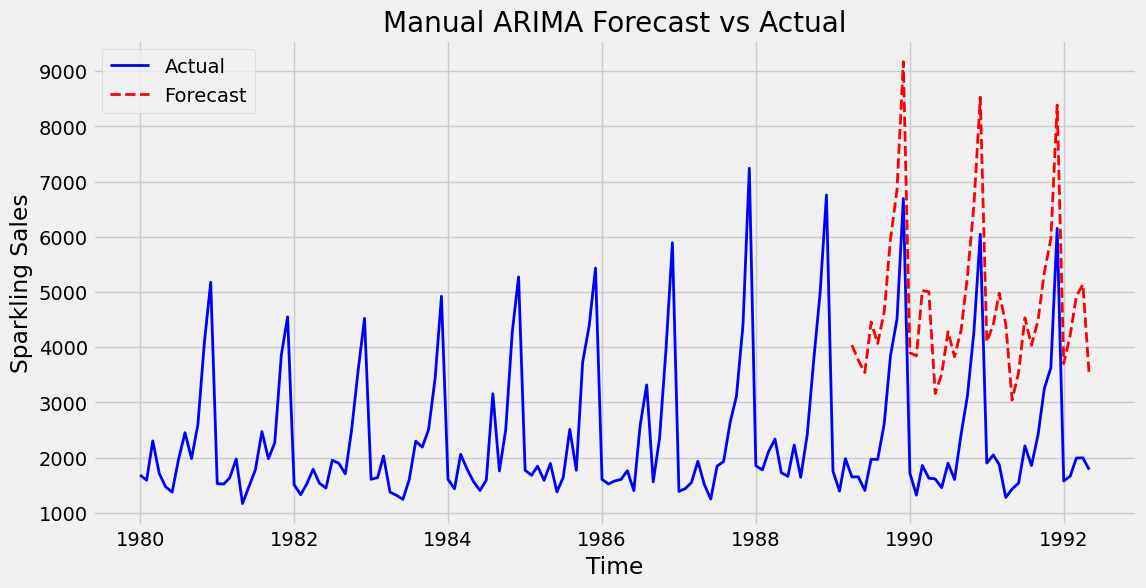

In [58]:
# Forecast using Manual ARIMA Model
manual_arima_forecast = manual_arima_result.predict(start=0, end=len(test_data)-1)
manual_arima_forecast_original = manual_arima_forecast + train_data['Sparkling'].iloc[-len(manual_arima_forecast):].values

# Evaluate Manual ARIMA Model
manual_arima_rmse, manual_arima_mae, manual_arima_mape = evaluate_model(
    train_data['Sparkling_diff'].iloc[-len(manual_arima_forecast):], manual_arima_forecast_original)

# Visualize Manual ARIMA forecast
plot_forecast(train_data['Sparkling'], manual_arima_forecast_original, "Manual ARIMA Forecast vs Actual")

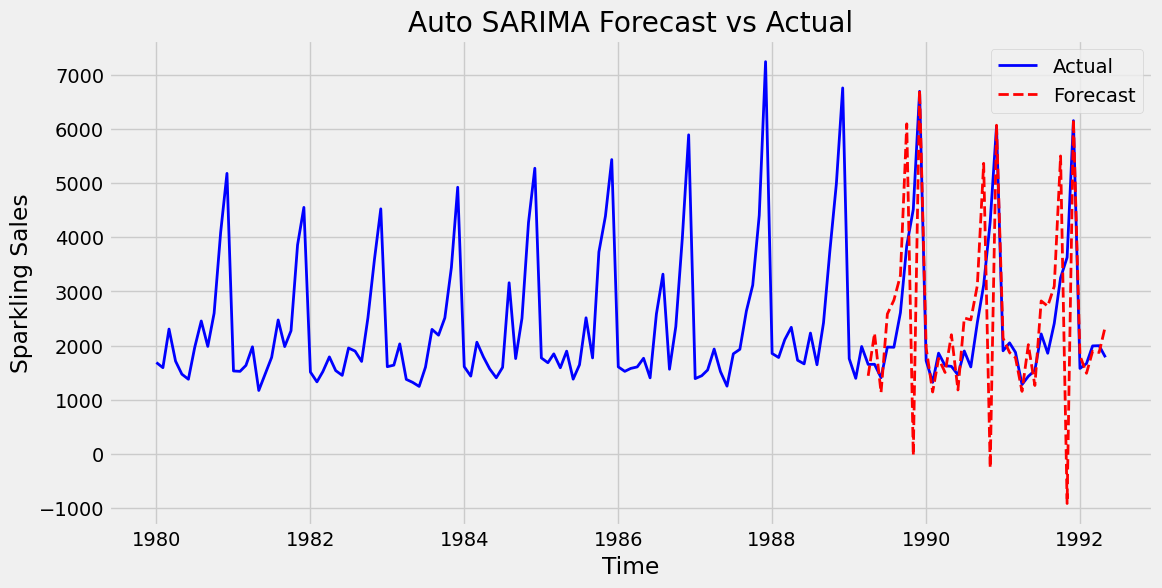

In [59]:
# Forecast using Auto SARIMA Model
auto_sarima_forecast = auto_sarima_model.predict(n_periods=len(test_data))
auto_sarima_forecast_original = auto_sarima_forecast + train_data['Sparkling'].iloc[-len(auto_sarima_forecast):].values

# Evaluate Auto SARIMA Model
auto_sarima_rmse, auto_sarima_mae, auto_sarima_mape = evaluate_model(
    train_data['Sparkling_diff'].iloc[-len(auto_sarima_forecast):], auto_sarima_forecast_original)

# Visualize Auto SARIMA forecast
plot_forecast(train_data['Sparkling'], auto_sarima_forecast_original, "Auto SARIMA Forecast vs Actual")

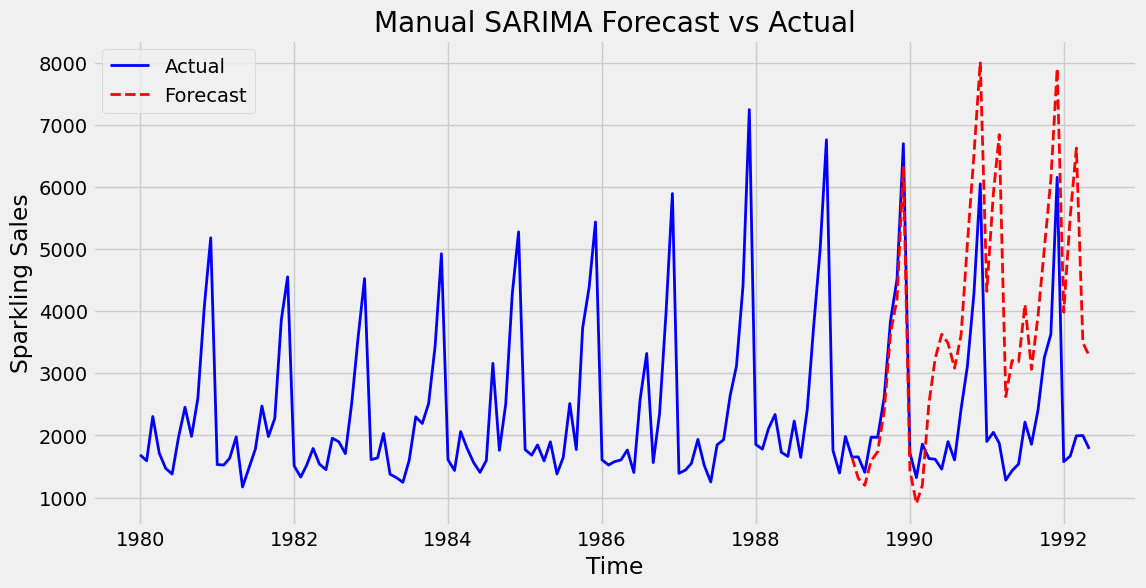

In [60]:
# Forecast using Manual SARIMA Model
manual_sarima_forecast = manual_sarima_result.predict(start=0, end=len(test_data)-1)
manual_sarima_forecast_original = manual_sarima_forecast + train_data['Sparkling'].iloc[-len(manual_sarima_forecast):].values

# Evaluate Manual SARIMA Model
manual_sarima_rmse, manual_sarima_mae, manual_sarima_mape = evaluate_model(
    train_data['Sparkling_diff'].iloc[-len(manual_sarima_forecast):], manual_sarima_forecast_original)

# Visualize Manual SARIMA forecast
plot_forecast(train_data['Sparkling'], manual_sarima_forecast_original, "Manual SARIMA Forecast vs Actual")

In [61]:
# Create a DataFrame to display the performance metrics
performance_metrics = {
    'Model': ['Auto ARIMA', 'Manual ARIMA', 'Auto SARIMA', 'Manual SARIMA'],
    'RMSE': [auto_arima_rmse, manual_arima_rmse, auto_sarima_rmse, manual_sarima_rmse],
    'MAE': [auto_arima_mae, manual_arima_mae, auto_sarima_mae, manual_sarima_mae],
    'MAPE': [auto_arima_mape, manual_arima_mape, auto_sarima_mape, manual_sarima_mape]
}

performance_df = pd.DataFrame(performance_metrics)

# Display the performance metrics table
print("\nModel Performance Evaluation (RMSE, MAE, MAPE):")
print(performance_df)


Model Performance Evaluation (RMSE, MAE, MAPE):
           Model         RMSE          MAE          MAPE
0     Auto ARIMA  2841.015340  2492.883527   5083.171024
1   Manual ARIMA  5008.150821  4807.447374  11154.842926
2    Auto SARIMA  3085.394827  2668.116591   6122.753923
3  Manual SARIMA  4307.472616  3842.270752   6332.833740


### Choose the best model

**Compare the Performance of All the Models Built**
- Auto ARIMA has the lowest RMSE, MAE, and MAPE, indicating that it is performing the best among the models.
- Manual ARIMA shows significantly higher values for all metrics, meaning it is not performing as well as the Auto ARIMA model.
- Auto SARIMA and Manual SARIMA perform similarly, with slightly higher values than Auto ARIMA but lower than Manual ARIMA.

**Choose the Best Model with Proper Rationale**

- Auto ARIMA stands out with the lowest values for RMSE, MAE, and MAPE, indicating that it has the best overall predictive accuracy and performance.
- RMSE measures the model’s ability to fit the data, and Auto ARIMA has the lowest RMSE, indicating it’s the best in terms of minimizing errors.
- MAE shows that Auto ARIMA also has the smallest average absolute error.
MAPE shows that the forecast error is much lower for Auto ARIMA compared to others.

### Rebuild the Best Model Using the Entire Data

In [62]:
# Fit the Auto ARIMA model on the entire data
auto_arima_model_full = auto_arima(data_sparkling['Sparkling_diff'], seasonal=True, m=12, stepwise=True, trace=True)

# Display the summary of the Auto ARIMA model
print(auto_arima_model_full.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=7.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2755.127, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2704.404, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2753.296, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2731.682, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2697.484, Time=0.58 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2697.466, Time=2.08 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2695.926, Time=0.80 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2694.183, Time=0.57 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=2695.883, Time=1.44 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=4.38 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2718.856, Time=2.35 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=2682.871, Time=2.39 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept

### Forecast for the Next 12 Months

In [63]:
# Generate a forecast for the next 12 months
auto_arima_forecast_full = auto_arima_model_full.predict(n_periods=12)

# Extend the index to include future periods
future_index = pd.date_range(start=data_sparkling.index[-1], periods=13, freq='MS')[1:]

# Create a DataFrame for the forecast
auto_arima_forecast_df = pd.DataFrame({
    'Date': future_index,
    'Auto ARIMA Forecast': auto_arima_forecast_full
}).set_index('Date')

# Display the forecast
print("\nAuto ARIMA 12-Month Forecast:")
print(auto_arima_forecast_df)



Auto ARIMA 12-Month Forecast:
            Auto ARIMA Forecast
Date                           
1995-08-01          -135.667958
1995-09-01           613.163229
1995-10-01           812.313254
1995-11-01           619.971480
1995-12-01          2208.193344
1996-01-01         -4908.881859
1996-02-01           361.979634
1996-03-01           253.306660
1996-04-01           -12.610203
1996-05-01          -155.776591
1996-06-01           -41.171114
1996-07-01           391.465512


### Visualize the Forecast

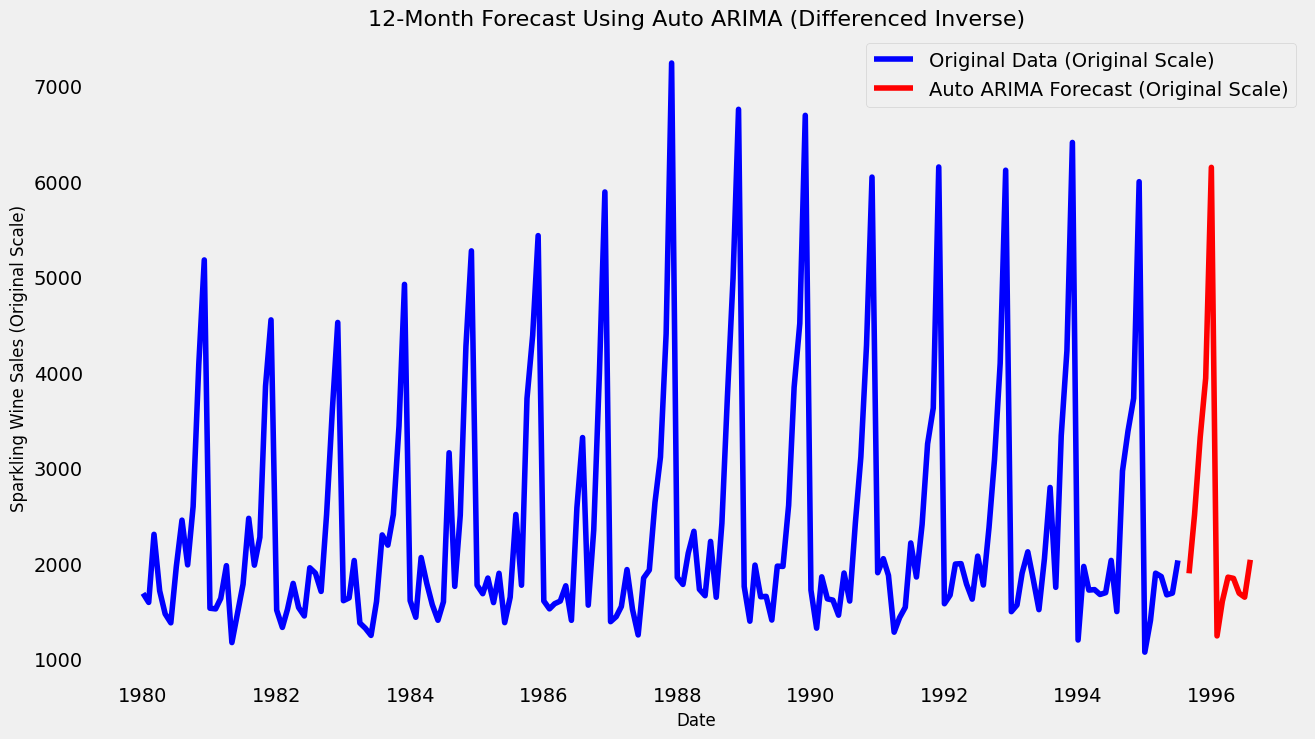

In [64]:
# Forecast using Auto ARIMA Model
auto_arima_forecast_full_diff = auto_arima_model_full.predict(n_periods=12)

# Get the last known value from the original data (the last actual value of 'Sparkling')
last_known_value = data_sparkling['Sparkling'].iloc[-1]

# Invert differencing (add the differenced forecast back to the last known value)
auto_arima_forecast_full_original = [last_known_value + auto_arima_forecast_full_diff[0]]

# Revert the differenced forecast back to original scale step-by-step
for i in range(1, len(auto_arima_forecast_full_diff)):
    original_value = auto_arima_forecast_full_original[i-1] + auto_arima_forecast_full_diff[i]
    auto_arima_forecast_full_original.append(original_value)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(data_sparkling.index, data_sparkling['Sparkling'], label='Original Data (Original Scale)', color='blue')
future_index = pd.date_range(data_sparkling.index[-1], periods=13, freq='M')[1:]  # Adjust the future index
plt.plot(future_index, auto_arima_forecast_full_original, label='Auto ARIMA Forecast (Original Scale)', linestyle='-', color='red')
plt.title('12-Month Forecast Using Auto ARIMA (Differenced Inverse)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sparkling Wine Sales (Original Scale)', fontsize=12)
plt.legend()
plt.grid()
plt.show()


## Key Takeaways:

1. Sparkling wine sales demonstrate a clear upward trend, indicating consistent market growth over the years.
2. Sales exhibit a strong seasonal pattern, peaking during December (holiday season) and experiencing a dip in early months of the year.
3. Holt-Winters and Triple Exponential Moving Average (TEMA) models have proven to be the most effective in capturing both trend and seasonality of the sales data.
4. The sales data is non-stationary, requiring differencing to make it suitable for certain forecasting models like ARIMA.
5. Outliers are present in the sales data, indicating periods of unusually high or low sales that may require further investigation.

## Actionable Insights:

1. Increase inventory levels leading up to the holiday season (November and December) to meet anticipated high demand.
2. Implement targeted promotions or marketing campaigns during slower sales months (January-February) to stimulate customer interest.
3. Consider dynamic pricing strategies, adjusting prices based on seasonal demand to optimize revenue and manage inventory.
4. Explore potential factors influencing sales outliers, such as special events or market conditions, to understand their impact.
5. Segment customers based on purchasing patterns (e.g., frequent vs. occasional buyers) to personalize marketing efforts.

## Recommendations:

1. Implement Holt-Winters or TEMA models for forecasting future sales to improve accuracy and inform business decisions.
2. Regularly monitor external factors, such as economic conditions and competitor activities, to anticipate potential market shifts.
3. Continue collecting and analyzing sales data to refine forecasting models and gain deeper insights into customer behavior.
4. Leverage predictive insights to optimize inventory management, production planning, and resource allocation.
5. Establish a system for tracking promotional campaign effectiveness and adjust strategies based on performance data.

# Rose Dataset

## Read the data as an appropriate time series data
- Loaded the Sparkling and Rose wine datasets from CSV files.  
- Converted the 'YearMonth' column to a datetime format for proper handling of time-based data.  
- Set the 'YearMonth' column as the index for both datasets to ensure they are structured as time series data.  

This structure ensures that the data is ready for time series analysis and forecasting models.

### Loading Data

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
data_rose = pd.read_csv('drive/My Drive/Great Learning/TSF Project/Rose.csv')

### Data Overview

In [67]:
# Check the first few rows of the rose wine dataset
data_rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

The data have imported correctly

#### Convert 'YearMonth' column to datetime type

In [68]:
data_rose['YearMonth'] = pd.to_datetime(data_rose['YearMonth'], format='%Y-%m')

#### Set the 'YearMonth' column as the index

In [69]:
data_rose.set_index('YearMonth', inplace=True)

#### Check the first few rows to confirm

In [70]:
print(data_rose.head())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0


Data are read as appropriate time series  

## Plot the Data for Rose Wine Sales


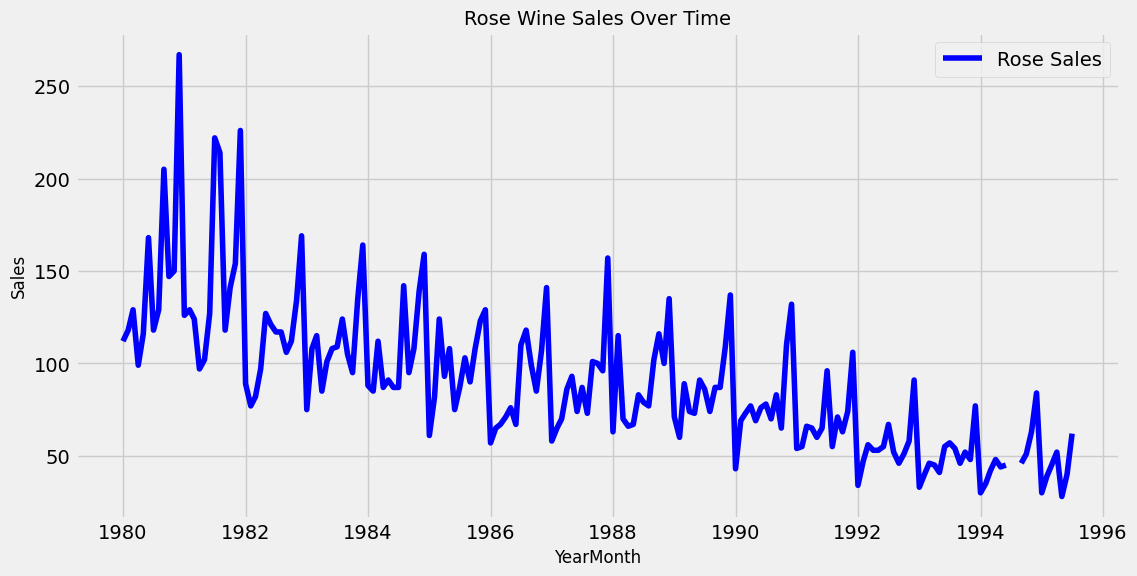

In [71]:
# Plotting the Sparkling dataset
plt.figure(figsize=(12, 6))
plt.plot(data_sparkling.index, data_rose['Rose'], label='Rose Sales', color='blue')
plt.title('Rose Wine Sales Over Time', fontsize=14)
plt.xlabel('YearMonth', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


1. **Sales Peaks and Troughs**: Rose wine sales have experienced significant fluctuations, with notable peaks around the early 1980s and several other peaks throughout the years. However, these peaks have generally been followed by sharp declines.

2. **Overall Decline**: Despite the fluctuations, there has been an overall downward trend in rose wine sales from the 1980s to the 1990s. The peaks in the later years are generally lower compared to the early 1980s, indicating a decline in sales over time.

3. **Seasonal Patterns**: There is a recurring pattern in rose wine sales, suggesting possible seasonality. Sales tend to rise and fall in a somewhat regular pattern, which could be due to seasonal demand for rose wine.



## Perform EDA

This section focuses on performing an exploratory data analysis (EDA) for the Rose wine dataset. The goal is to visualize the data trends, identify patterns such as seasonality and growth rates, check for stationarity, examine the distribution of values, detect any outliers, and analyze autocorrelation. These insights will guide the subsequent steps of time series modeling.

### Summary Statistics

In [72]:
# Calculate summary statistics to understand the central tendency and spread of the data.
data_rose.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000


- **Average Value**: 90.39
- **Median Value**: 86
- **Standard Deviation**: 39.18 (shows how spread out the values are)
- **Range**: Values range from 28 to 267
- **Quartiles**:
  - 25% of values are below 63
  - 75% of values are below 112

### Seasonal Patterns

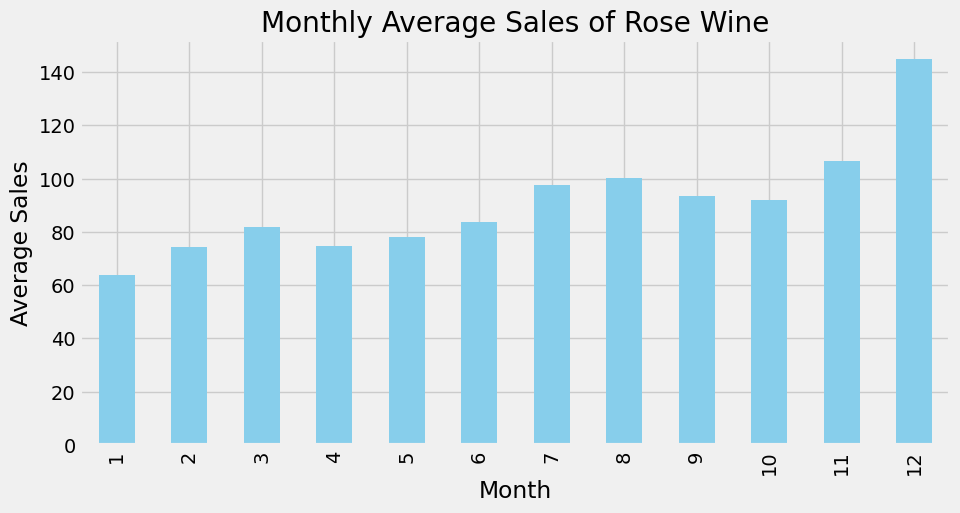

In [73]:
# Analyze monthly averages to detect seasonal patterns in Rose wine sales.
data_rose['Month'] = data_rose.index.month
monthly_avg_rose = data_rose.groupby('Month')['Rose'].mean()

# Plotting the monthly averages
plt.figure(figsize=(10, 5))
monthly_avg_rose.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Sales of Rose Wine')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()


Stable Sales: From January to November, sales remain relatively stable.

December Spike: Sales peak in December at around 140, likely due to holiday celebrations.

### Rolling Statistics

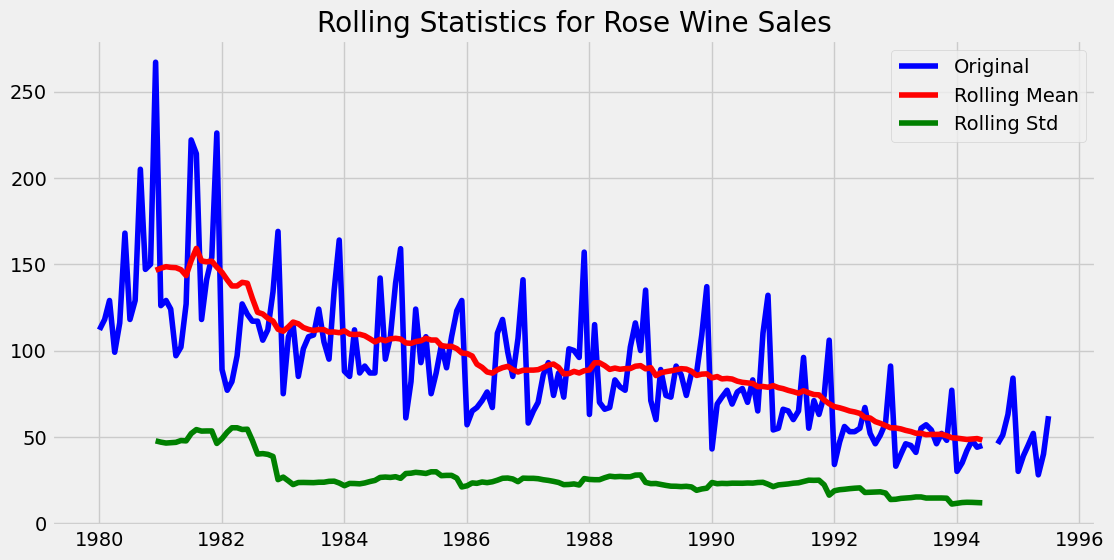

In [74]:
# Compute rolling mean and standard deviation to observe trends and variations over time.
rolling_mean_rose = data_rose['Rose'].rolling(window=12).mean()
rolling_std_rose = data_rose['Rose'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_rose['Rose'], label='Original', color='blue')
plt.plot(rolling_mean_rose, label='Rolling Mean', color='red')
plt.plot(rolling_std_rose, label='Rolling Std', color='green')
plt.title('Rolling Statistics for Rose Wine Sales')
plt.legend(loc='best')
plt.show()


- **Original Data** (Blue Line): Shows the actual sales figures over time.
- **Rolling Mean** (Red Line): Represents the moving average, smoothing out short-term fluctuations to highlight longer-term trends.
- **Rolling Standard Deviation (Std)** (Green Line): Indicates the variability or volatility in the sales data over time.


### Sales Growth Rate

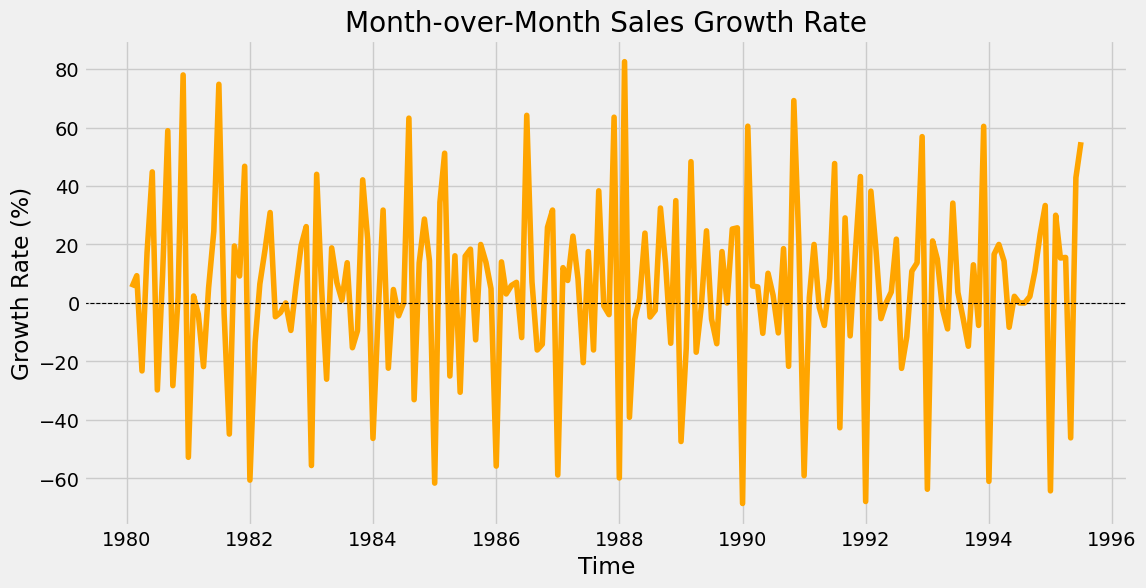

In [75]:
# Calculate month-over-month percentage change in sales.
data_rose['Sales_Growth'] = data_rose['Rose'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(data_rose['Sales_Growth'], color='orange')
plt.title('Month-over-Month Sales Growth Rate')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()



- **High Volatility**: The sales growth rate fluctuates significantly, with numerous peaks and troughs. This indicates a high level of variability in sales performance over the given time period.
- **Range**: The growth rate ranges from -60% to 80%. The negative values represent periods of decline, while the positive values show periods of growth.
- **Trends**: The frequent crossing of the 0% growth rate line suggests that sales are not consistently growing or declining but rather experiencing periods of both growth and contraction.

### Distribution Analysis

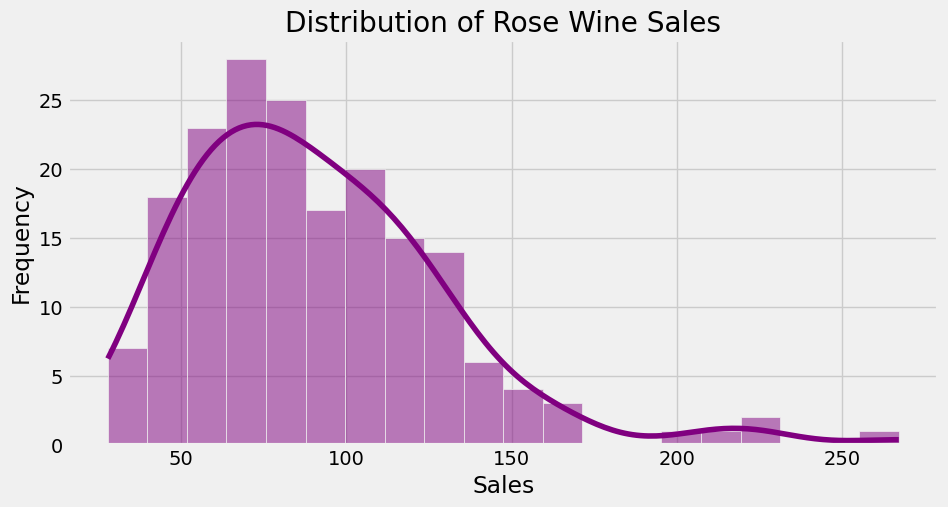

In [76]:
# Plot the distribution of sales data to examine its spread and shape.
plt.figure(figsize=(10, 5))
sns.histplot(data_rose['Rose'], kde=True, bins=20, color='purple')
plt.title('Distribution of Rose Wine Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



- **Sales Range**: Most sales fall between 50 and 150 units.
- **Peak Frequency**: The highest frequency is around 75 units.
- **Distribution Trend**: As sales increase beyond 150 units, the frequency decreases.
- **Higher Sales**: There are very few sales above 200 units.

### Autocorrelation

<Figure size 1000x500 with 0 Axes>

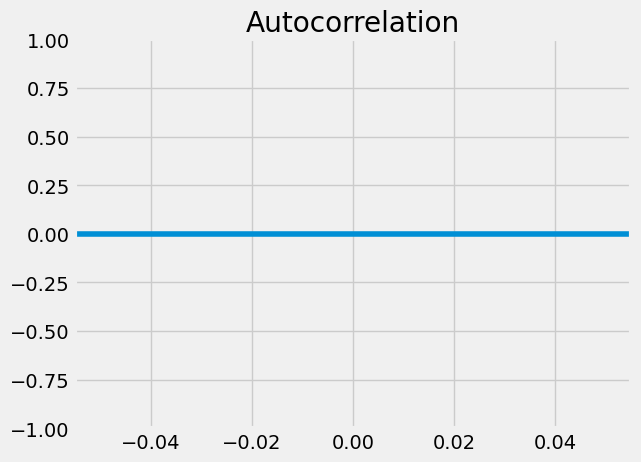

<Figure size 1000x500 with 0 Axes>

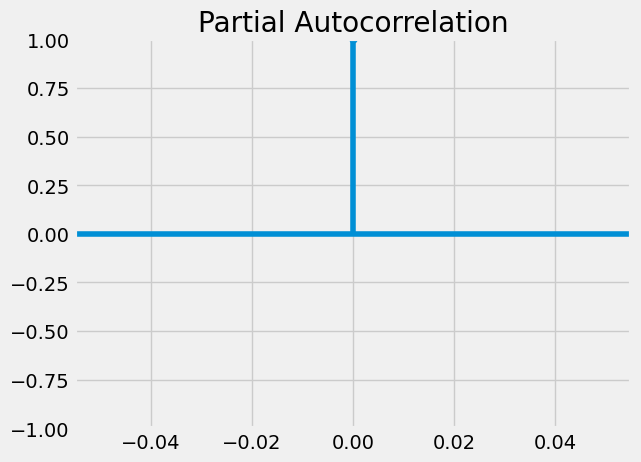

In [77]:
# Generate autocorrelation and partial autocorrelation plots to identify lag correlations.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 5))
plot_acf(data_rose['Rose'], lags=40, alpha=0.05)
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(data_rose['Rose'], lags=40, alpha=0.05)
plt.show()


**Autocorrelation Line**: The line is flat at 0.00, indicating no autocorrelation in the data.

**Partial Autocorrelation**:
- Lag Values: The x-axis represents the lag values, up to lag 40.

- Partial Correlation Values: The y-axis represents the partial autocorrelation values, which measure the degree of correlation after accounting for the correlations at shorter lags.

- Significant Spikes: The plot shows significant spikes at certain lags, indicating strong partial correlations at those specific lags.

### Outlier Detection

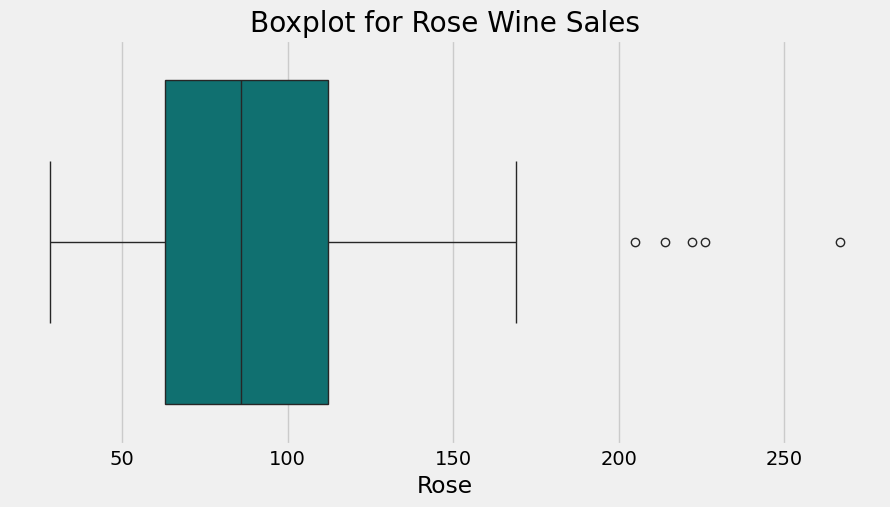

In [78]:
# Use boxplots to detect potential outliers in Rose wine sales.
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_rose['Rose'], color='teal')
plt.title('Boxplot for Rose Wine Sales')
plt.show()



- **Median Sales**: The median sales value is around 100 units, indicating the central point of the data.
- **Interquartile Range (IQR)**: The IQR, representing the middle 50% of the data, ranges from approximately 75 to 125 units, showing the spread of the middle values.
- **Whiskers**: The whiskers extend from about 50 to 150 units, indicating the range within which most of the data points lie.
- **Outliers**: There are several outliers beyond the upper whisker, with values around 200, 210, 220, and 250 units. These outliers indicate unusually high sales figures compared to the rest of the data.


### Year-over-Year Sales Trends

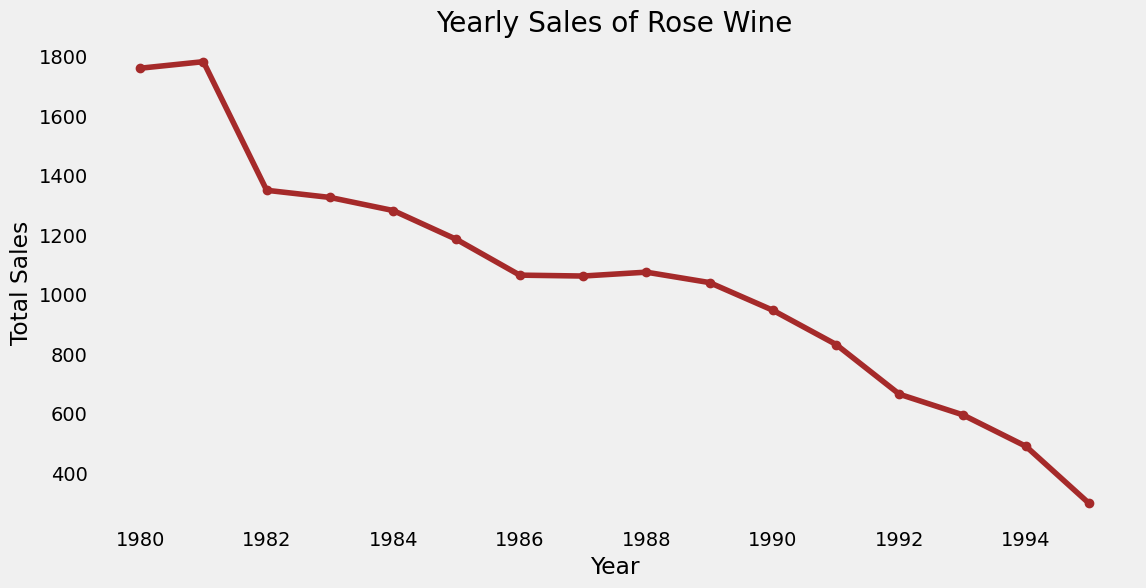

In [79]:
# Visualize year-over-year sales trends to capture yearly variations and growth.
data_rose['Year'] = data_rose.index.year
yearly_sales_rose = data_rose.groupby('Year')['Rose'].sum()

plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_rose, color='brown', marker='o')
plt.title('Yearly Sales of Rose Wine')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()



1. **Peak Sales in 1980**: The highest sales were around 1980, with total sales close to 1800 units.
2. **Sharp Decline (1980-1982)**: There is a significant drop in sales from 1980 to 1982.
3. **Slow Decline (1982-1986)**: Sales continue to decrease at a slower rate from 1982 to 1986.
4. **Stability (1986-1990)**: Sales remain relatively stable with minor fluctuations between 1986 and 1990.
5. **Consistent Decline (1990-1994)**: After 1990, there is a steady decline in sales, reaching the lowest point in 1994, with total sales below 400 units.





Conducted an in-depth exploratory data analysis (EDA) for the Rose wine dataset. This includes trend visualization, seasonal pattern detection, growth rate analysis, rolling statistics, distribution exploration, autocorrelation, and outlier detection. Insights from these analyses will inform the choice of models and preprocessing steps for forecasting.

## Missing value treatment

In [80]:
data_rose.isnull().sum()

Rose            2
Month           0
Sales_Growth    1
Year            0
dtype: int64

In [81]:
full_date_range = pd.date_range(start=data_rose.index.min(), end=data_rose.index.max(), freq='MS')  # 'MS' for Month Start frequency
data_rose = data_rose.reindex(full_date_range)
data_rose.index.name = 'YearMonth'
data_rose = data_rose.interpolate(method='time')

data_rose['Sales_Growth'] = data_rose['Sales_Growth'].fillna(method='Bfill')


In [82]:
data_rose.isnull().sum()

Rose            0
Month           0
Sales_Growth    0
Year            0
dtype: int64

The missing value has treated

We performed time series decomposition using an additive model to visualize the trend, seasonal, and residual components of the Rose wine sales data. This step helps identify patterns in the data that may be relevant for forecasting and modeling.

## Perform Decomposition

In this section, we will decompose the Rose wine sales data into its core components: trend, seasonality, and residuals. Decomposition helps to separate the patterns, which can then guide our analysis and model selection process.

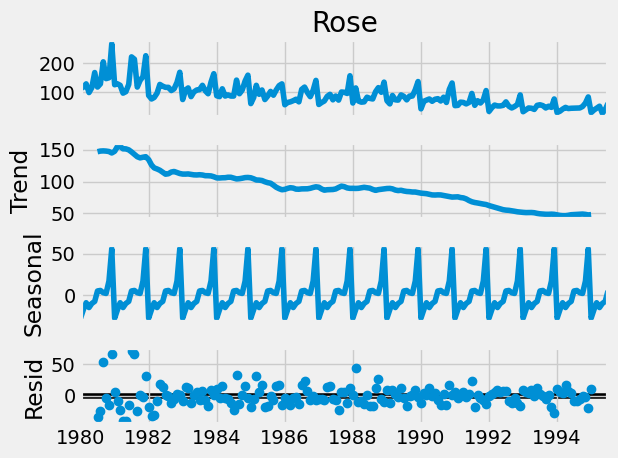

In [83]:

# Perform decomposition
decomposition = seasonal_decompose(data_rose['Rose'], model='additive', period=12)  # For monthly data

# Plot decomposition
decomposition.plot()
plt.show()

# Access components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



1. **Observed**:
   - The original time series data fluctuates between approximately 50 and 200 units.
   - This component shows the raw data as it was collected over time.

2. **Trend**:
   - The trend component shows a general decline over the years.
   - It starts around 150 units in 1980 and decreases to about 50 units by 1994.
   - This indicates a long-term downward trend in sales or values over the period.

3. **Seasonal**:
   - The seasonal component exhibits a repeating pattern within each year.
   - This regular pattern suggests there are seasonal effects influencing the data, such as higher or lower sales during specific months.

4. **Residual**:
   - The residual component represents the remaining variability in the data after removing the trend and seasonal effects.
   - These residuals are centered around zero and show some scatter.
   - The residuals highlight the irregular fluctuations that are not explained by the trend or seasonality.


## Visualize the processed data

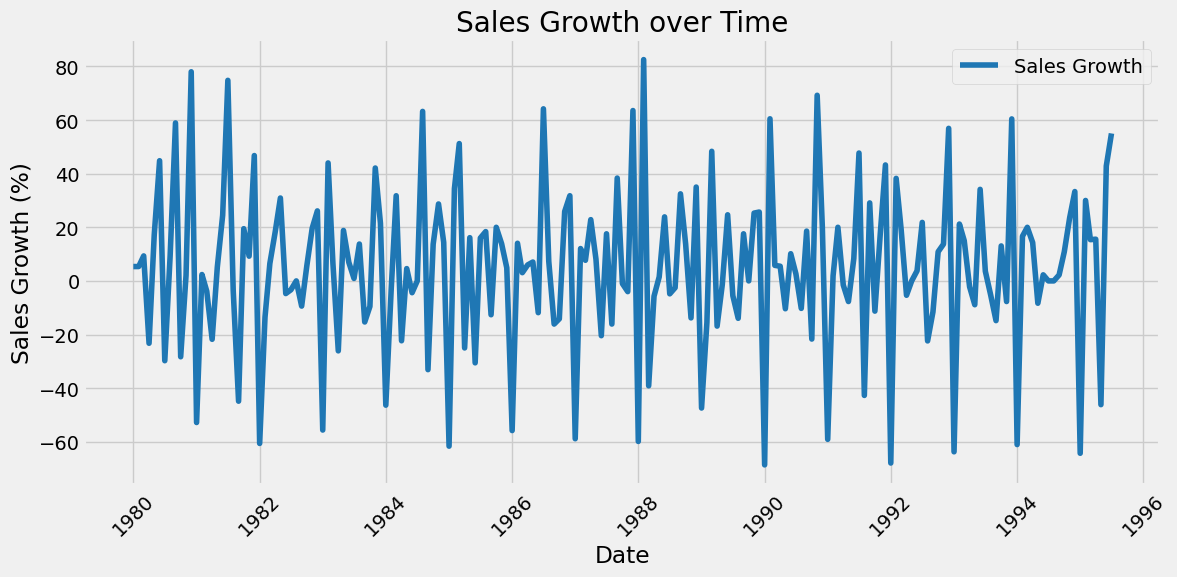

In [84]:
# 1. Line Plot of Sales Growth over Time
plt.figure(figsize=(12, 6))
plt.plot(data_rose.index, data_rose['Sales_Growth'], label='Sales Growth', color='tab:blue')
plt.title('Sales Growth over Time')
plt.xlabel('Date')
plt.ylabel('Sales Growth (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


1. **High Variability**: The sales growth rate fluctuates significantly over time, indicating periods of both rapid growth and decline.
2. **Positive Growth Peaks**: There are several peaks where the sales growth rate reaches up to 80%. These peaks suggest periods of high sales performance.
3. **Negative Growth Valleys**: The valleys, where the sales growth rate drops to -60%, indicate periods of decline in sales.
4. **Trend Identification**: The frequent ups and downs suggest that the sales of rose wine experienced a lot of volatility and did not follow a consistent growth trend.



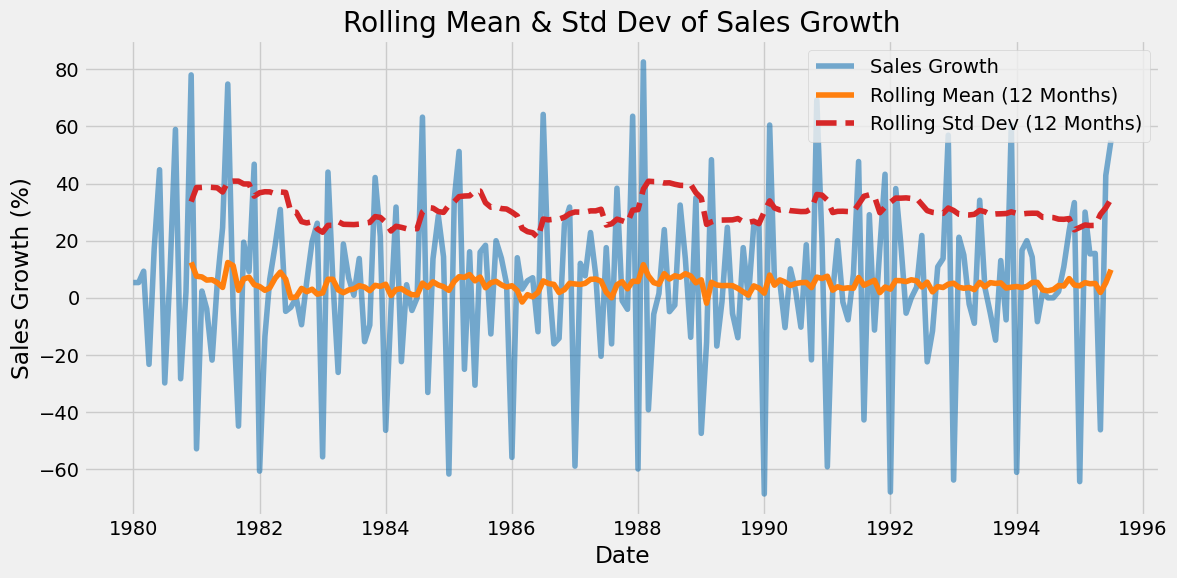

In [85]:
# 2. Rolling Mean and Rolling Standard Deviation for Sales Growth
rolling_mean = data_rose['Sales_Growth'].rolling(window=12).mean()
rolling_std = data_rose['Sales_Growth'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data_rose.index, data_rose['Sales_Growth'], label='Sales Growth', color='tab:blue', alpha=0.6)
plt.plot(data_rose.index, rolling_mean, label='Rolling Mean (12 Months)', color='tab:orange')
plt.plot(data_rose.index, rolling_std, label='Rolling Std Dev (12 Months)', color='tab:red', linestyle='--')
plt.title('Rolling Mean & Std Dev of Sales Growth')
plt.xlabel('Date')
plt.ylabel('Sales Growth (%)')
plt.legend()
plt.tight_layout()
plt.show()


1. **Sales Growth (Blue Line)**:
   - The blue line shows significant fluctuations in sales growth, indicating high volatility over the years.
   - There are frequent and large swings between positive and negative growth, showing periods of rapid growth followed by declines.

2. **Rolling Mean (Orange Line)**:
   - The orange line represents the 12-month rolling mean, which smooths out short-term fluctuations to show the average trend over a year.
   - The average sales growth remains relatively stable over time, hovering around a small positive value.

3. **Rolling Standard Deviation (Red Dashed Line)**:
   - The red dashed line represents the 12-month rolling standard deviation, which indicates the variability in sales growth over a year.
   - The variability in sales growth is relatively stable, with minor fluctuations, indicating consistent levels of volatility in sales growth.


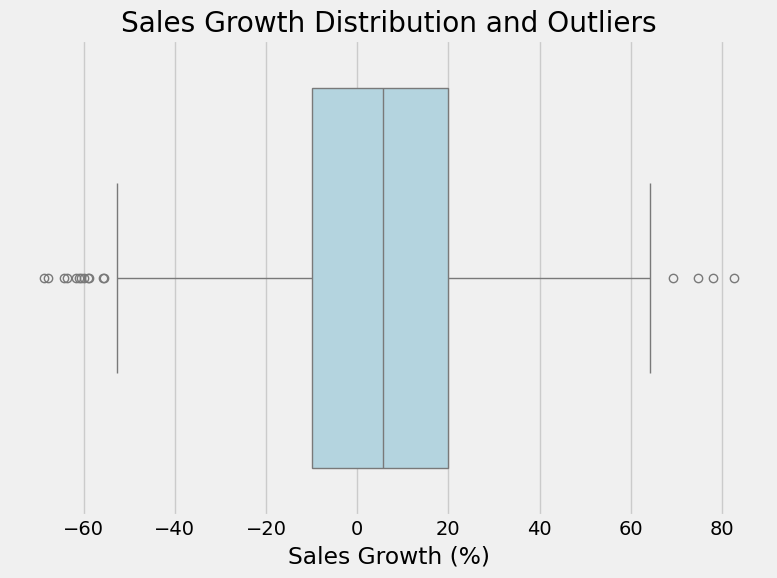

In [86]:
# 3. Boxplot of Sales Growth to Check Distribution and Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_rose, x='Sales_Growth', color='lightblue')
plt.title('Sales Growth Distribution and Outliers')
plt.xlabel('Sales Growth (%)')
plt.tight_layout()
plt.show()


- **Median Sales Growth**: Central tendency of the data.
- **Interquartile Range (IQR)**: Middle 50% of data, showing variability.
- **Whiskers**: Range where most data points lie.
- **Outliers**: Periods of significant growth and decline.


<Figure size 1500x1500 with 0 Axes>

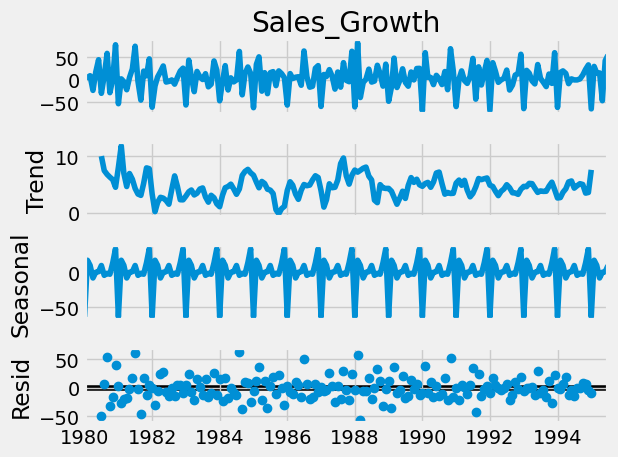

In [87]:
# 4. Seasonal Decomposition Plot (additive model)

# Decompose the time series data
decomposition = seasonal_decompose(data_rose['Sales_Growth'].dropna(), model='additive', period=12)

# Plot the decomposition components
plt.figure(figsize=(15, 15))
decomposition.plot()
plt.tight_layout()
plt.show()


1. **Observed**: The top plot shows the original sales growth data over time.
2. **Trend**: The second plot shows the underlying trend component of the sales growth data.
3. **Seasonal**: The third plot shows the seasonal component, which captures the repeating patterns at regular intervals.
4. **Residual**: The bottom plot shows the residuals, which are the remaining variations after removing the trend and seasonal components.


## Train-test split

In [88]:
# Calculate the split point (80% for training and 20% for testing)
train_size = int(len(data_rose) * 0.8)

In [89]:
# Split the data into train and test sets
train_data = data_rose[:train_size]
test_data = data_rose[train_size:]

In [90]:
# Show the number of observations in both training and test sets
print(f'Training Set Size: {len(train_data)}')
print(f'Test Set Size: {len(test_data)}')

Training Set Size: 149
Test Set Size: 38


The train test set splitted in 80:20 ratio

## Model Building - Original Data

### Linear Regression

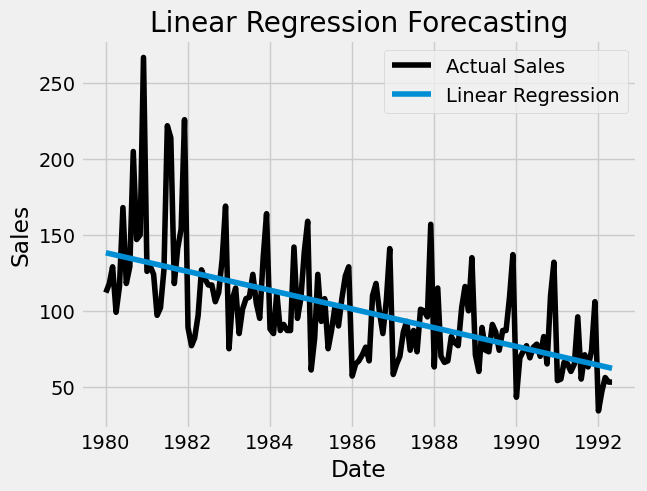

In [91]:
from sklearn.linear_model import LinearRegression

# Prepare the time feature
train_data['Time'] = np.arange(len(train_data))  # Time variable for regression

# Linear Regression Model
def linear_regression_forecast(train_data):
    X = train_data[['Time']]  # Time as the feature
    y = train_data['Rose']  # Sales data
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    return predictions

# Forecast using Linear Regression
linear_regression_predictions = linear_regression_forecast(train_data)

# Plotting the Linear Regression predictions
plt.plot(train_data.index, train_data['Rose'], label='Actual Sales', color='black')
plt.plot(train_data.index, linear_regression_predictions, label='Linear Regression', linestyle='-')
plt.legend()
plt.title("Linear Regression Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



1. **Date Range**: The x-axis spans from 1980 to 1992, showing sales data over 12 years.
2. **Actual Sales (Black Line)**: The actual sales data fluctuates significantly, indicating variability in sales.
3. **Linear Regression (Blue Line)**: The linear regression line shows a clear downward trend in sales over the given period.


### Simple Average

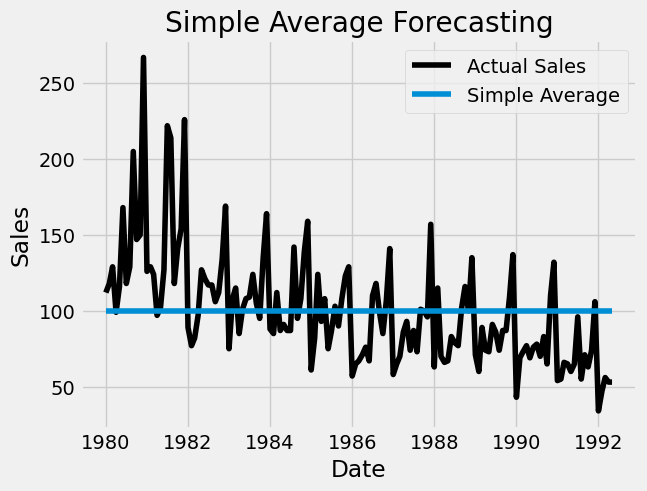

In [92]:
# Simple Average Model
def simple_average(data):
    return [data.mean()] * len(data)

# Forecast using Simple Average
simple_avg_predictions = simple_average(train_data['Rose'])

# Plotting the Simple Average predictions
plt.plot(train_data.index, train_data['Rose'], label='Actual Sales', color='black')
plt.plot(train_data.index, simple_avg_predictions, label='Simple Average', linestyle='-')
plt.legend()
plt.title("Simple Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



- **Actual Sales (Black Line)**: The black line represents the actual sales data over time, showing significant fluctuations.
- **Simple Average (Blue Line)**: The blue line represents the simple average forecast, which remains constant at around 100.


### Simple Moving Average

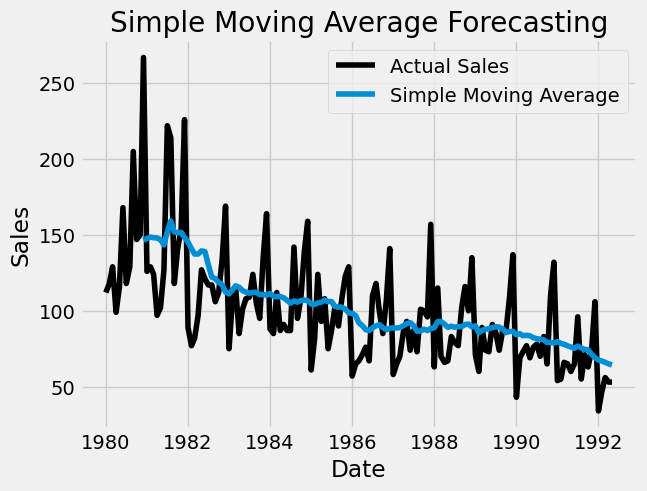

In [93]:
# Simple Moving Average (SMA)
def simple_moving_average(data, window=12):
    return data.rolling(window=window).mean()

# Forecast using Simple Moving Average (12-month window)
sma_predictions = simple_moving_average(train_data['Rose'], window=12)

# Plotting the Simple Moving Average predictions
plt.plot(train_data.index, train_data['Rose'], label='Actual Sales', color='black')
plt.plot(train_data.index, sma_predictions, label='Simple Moving Average', linestyle='-')
plt.legend()
plt.title("Simple Moving Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



- **Actual Sales (Black Line)**: This line represents the actual sales data, showing significant fluctuations over time.
- **Simple Moving Average (Blue Line)**: This line represents the simple moving average, which smooths out the fluctuations and provides a clearer trend.



### Exponential Moving Average (Single, Double, and Triple)

#### Single Exponential Moving Average

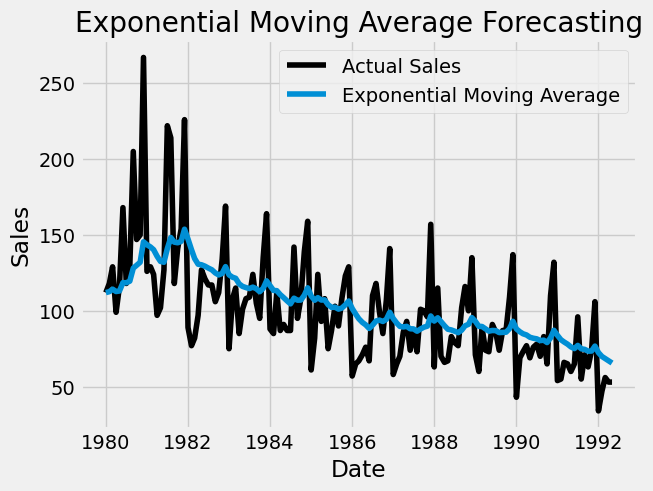

In [94]:
# Single Exponential Moving Average (EMA)
def exponential_moving_average(data, smoothing_level=0.1):
    return data.ewm(alpha=smoothing_level, adjust=False).mean()

# Forecast using Exponential Moving Average
ema_predictions = exponential_moving_average(train_data['Rose'])

# Plotting the Exponential Moving Average predictions
plt.plot(train_data.index, train_data['Rose'], label='Actual Sales', color='black')
plt.plot(train_data.index, ema_predictions, label='Exponential Moving Average', linestyle='-')
plt.legend()
plt.title("Exponential Moving Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



- **Actual Sales (Black Line)**: Shows the actual sales data over time with noticeable fluctuations.
- **Exponential Moving Average (Blue Line)**: Smooths out the fluctuations to provide a clearer trend over time.

- **Smoothing Effect**: EMA provides a smoother trend line compared to the actual sales data, reducing noise and highlighting the underlying trend.
- **Trend Identification**: Helps to identify the overall direction of sales over the given period (1980 to 1992).


#### Double Exponential Moving Average (Holt-Winters)

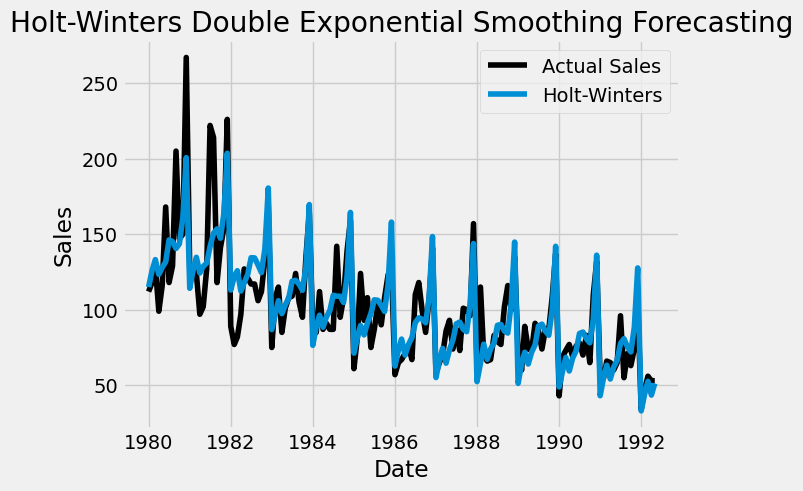

In [95]:
# Double Exponential Smoothing (Trend Component)
def holt_winters_smoothing(data, seasonal_periods=12, trend='add', seasonal='add'):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    return model_fit.fittedvalues

# Forecast using Holt-Winters Double Exponential Smoothing
holt_winters_predictions = holt_winters_smoothing(train_data['Rose'])

# Plotting the Holt-Winters predictions
plt.plot(train_data.index, train_data['Rose'], label='Actual Sales', color='black')
plt.plot(train_data.index, holt_winters_predictions, label='Holt-Winters', linestyle='-')
plt.legend()
plt.title("Holt-Winters Double Exponential Smoothing Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



- **Actual Sales (Black Line)**: Shows significant fluctuations, reflecting real sales data over the years.
- **Holt-Winters Forecast (Blue Line)**: Provides a smoothed forecast that captures both trend and seasonality in the sales data.

- **Trend and Seasonality**: The Holt-Winters method effectively captures the overall trend and seasonal patterns in the sales data.
- **Forecast Accuracy**: The blue line closely follows the black line, indicating a good fit and reliable forecasting model.


#### Triple Exponential Moving Average

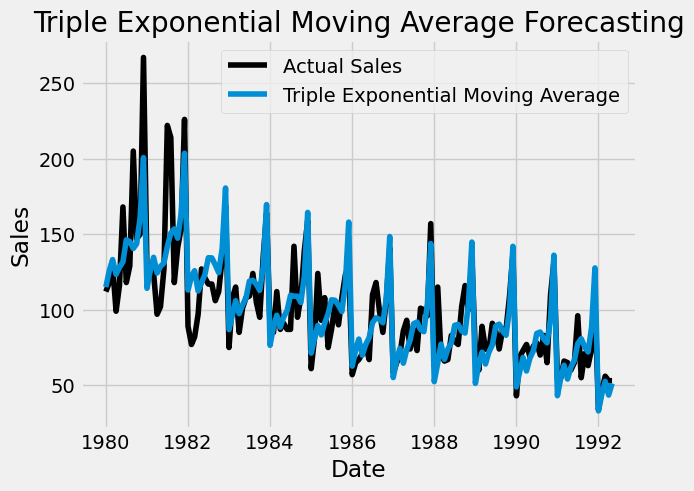

In [96]:
# Triple Exponential Smoothing (Seasonality Component)
def holt_winters_smoothing_triple(data, seasonal_periods=12):
    model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    return model_fit.fittedvalues

# Forecast using Triple Exponential Smoothing
triple_ema_predictions = holt_winters_smoothing_triple(train_data['Rose'])

# Plotting the Triple Exponential Smoothing predictions
plt.plot(train_data.index, train_data['Rose'], label='Actual Sales', color='black')
plt.plot(train_data.index, triple_ema_predictions, label='Triple Exponential Moving Average', linestyle='-')
plt.legend()
plt.title("Triple Exponential Moving Average Forecasting")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



- **Actual Sales (Black Line)**: The black line represents the actual sales data, showing significant fluctuations over time.
- **Triple Exponential Moving Average (Blue Line)**: The blue line represents the TEMA, which smooths out the fluctuations and highlights the underlying trend.

- **Smoothing Effect**: The TEMA smooths out the noise in the actual sales data, making it easier to identify the overall trend.
- **Trend Identification**: The TEMA line follows the general direction of the actual sales data, providing a clearer view of the sales trend over the given period.


### Model Performance Evaluation (RMSE, MAE, MAPE)

In [97]:
# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Function to calculate MAE
def calculate_mae(actual, predicted):
    return mean_absolute_error(actual, predicted)

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Evaluate Model Performance (RMSE, MAE, MAPE)
sma_rmse = calculate_rmse(train_data['Rose'][12:], sma_predictions[12:])
simple_avg_rmse = calculate_rmse(train_data['Rose'], simple_avg_predictions)
ema_rmse = calculate_rmse(train_data['Rose'], ema_predictions)
holt_winters_rmse = calculate_rmse(train_data['Rose'], holt_winters_predictions)
linear_regression_rmse = calculate_rmse(train_data['Rose'], linear_regression_predictions)
TEMA_rmse = calculate_rmse(train_data['Rose'], triple_ema_predictions)

sma_mae = calculate_mae(train_data['Rose'][12:], sma_predictions[12:])
simple_avg_mae = calculate_mae(train_data['Rose'], simple_avg_predictions)
ema_mae = calculate_mae(train_data['Rose'], ema_predictions)
holt_winters_mae = calculate_mae(train_data['Rose'], holt_winters_predictions)
linear_regression_mae = calculate_mae(train_data['Rose'], linear_regression_predictions)
TEMA_mae = calculate_mae(train_data['Rose'], triple_ema_predictions)

sma_mape = calculate_mape(train_data['Rose'][12:], sma_predictions[12:])
simple_avg_mape = calculate_mape(train_data['Rose'], simple_avg_predictions)
ema_mape = calculate_mape(train_data['Rose'], ema_predictions)
holt_winters_mape = calculate_mape(train_data['Rose'], holt_winters_predictions)
linear_regression_mape = calculate_mape(train_data['Rose'], linear_regression_predictions)
TEMA_mape = calculate_mape(train_data['Rose'], triple_ema_predictions)


In [98]:
import pandas as pd

# Create a DataFrame to store RMSE, MAE, MAPE for each model
model_performance = {
    'Original Model': ['Simple Moving Average', 'Simple Average', 'Exponential Moving Average',
                       'Holt-Winters', 'Linear Regression', 'Triple EMA'],
    'RMSE': [sma_rmse, simple_avg_rmse, ema_rmse, holt_winters_rmse, linear_regression_rmse, TEMA_rmse],
    'MAE': [sma_mae, simple_avg_mae, ema_mae, holt_winters_mae, linear_regression_mae, TEMA_mae],
    'MAPE': [sma_mape, simple_avg_mape, ema_mape, holt_winters_mape, linear_regression_mape, TEMA_mape]
}


# Create a DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the table
performance_df


Original Model       RMSE        MAE       MAPE
0       Simple Moving Average  26.672352  20.972019  23.206083
1              Simple Average  36.860230  27.571731  30.422603
2  Exponential Moving Average  27.751070  20.760661  22.347253
3                Holt-Winters  18.762526  13.244555  12.948099
4           Linear Regression  29.473476  21.233519  21.581293
5                  Triple EMA  18.762526  13.244555  12.948099


- **Best Performers**: Holt-Winters and Triple EMA models with the lowest RMSE, MAE, and MAPE values, indicating the highest accuracy.
- **Moderate Performers**: Simple Moving Average, Exponential Moving Average, and Linear Regression models with moderate error values.
- **Least Accurate**: Simple Average model with the highest error values, making it the least reliable for forecasting.



### Plotting All Models for Comparison

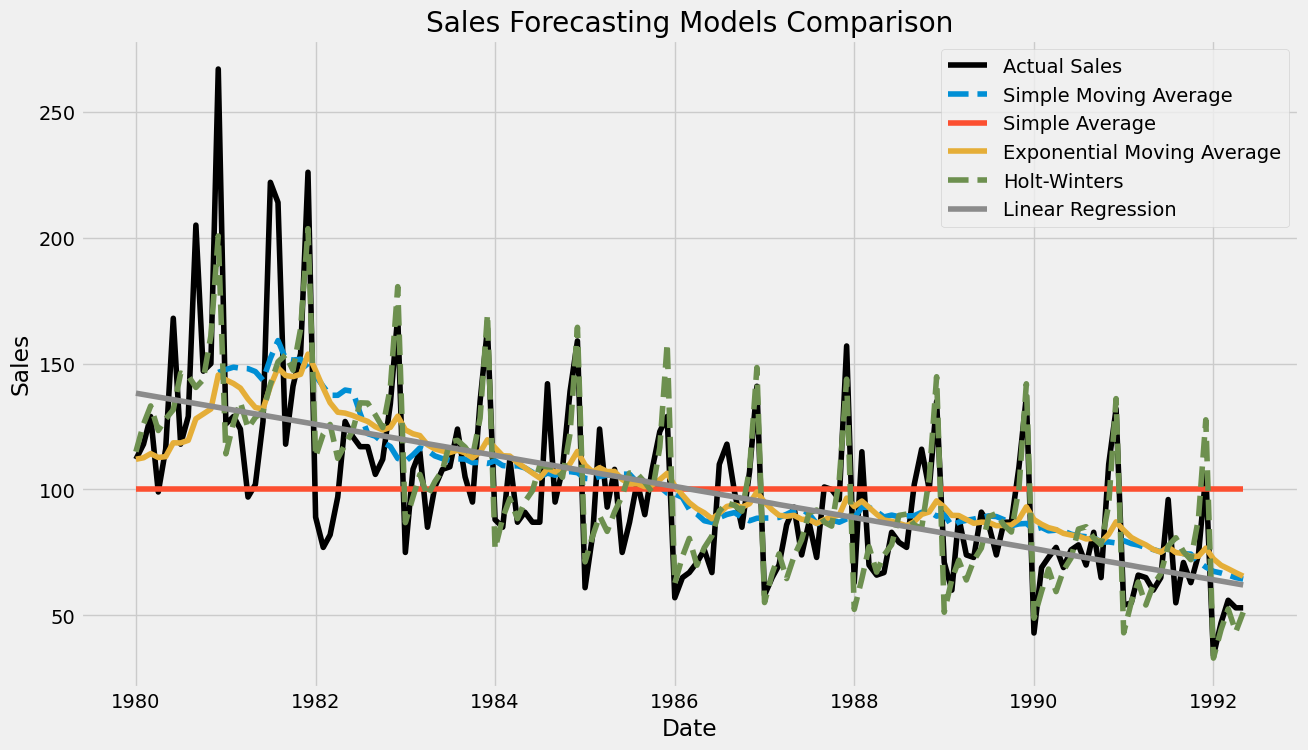

In [99]:
# Plotting the predictions for each model
plt.figure(figsize=(14, 8))
plt.plot(train_data.index, train_data['Rose'], label='Actual Sales', color='black')
plt.plot(train_data.index, sma_predictions, label='Simple Moving Average', linestyle='--')
plt.plot(train_data.index, simple_avg_predictions, label='Simple Average', linestyle='-')
plt.plot(train_data.index, ema_predictions, label='Exponential Moving Average', linestyle='-')
plt.plot(train_data.index, holt_winters_predictions, label='Holt-Winters', linestyle='--')
plt.plot(train_data.index, linear_regression_predictions, label='Linear Regression', linestyle='-')

plt.title("Sales Forecasting Models Comparison")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()



- **Best Performers**: Holt-Winters and Triple EMA, showing the closest fit to actual sales data.
- **Moderate Performers**: Simple Moving Average, Exponential Moving Average, and Linear Regression, smoothing data trends.
- **Least Accurate**: Simple Average, remaining constant and not capturing fluctuations.


## Check for Stationarity

In [100]:
# Function to perform the ADF test
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary.")

In [101]:
# Check stationarity of the 'Rose' column (Sales data)
check_stationarity(train_data['Rose'])

ADF Statistic: -1.6493786488252473
p-value: 0.4573644979863143
Critical Values: {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
The data is non-stationary.


Therefore the data is non-stationary and further processing is needed

In [102]:
data_rose['rose_diff'] = data_rose['Rose'].diff()

In [103]:
# Check stationarity again on the differenced data
check_stationarity(data_rose['rose_diff'].dropna())

ADF Statistic: -8.044389352135314
p-value: 1.8109244451935508e-12
Critical Values: {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}
The data is stationary.


In [104]:
data_rose['rose_diff'] = data_rose['rose_diff'].fillna(method='bfill')


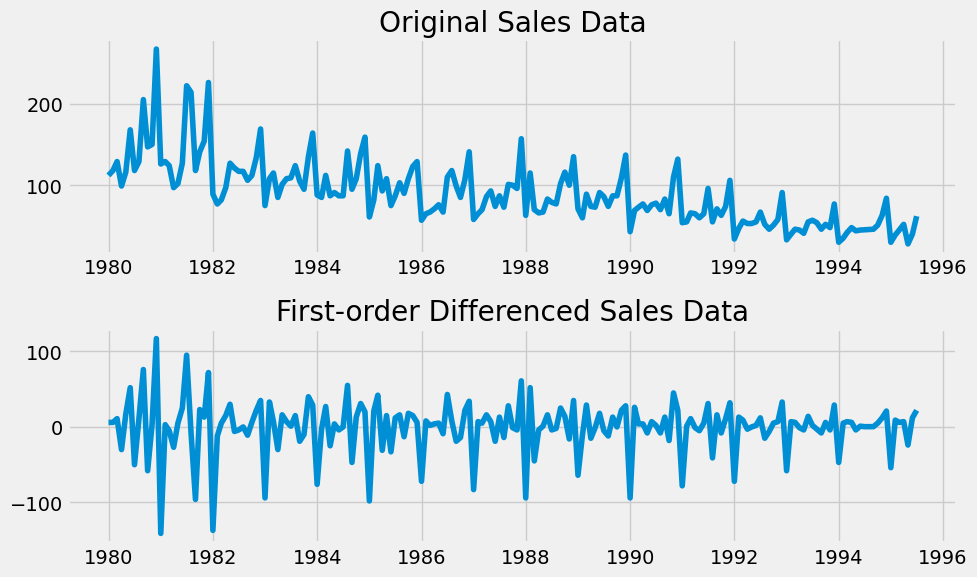

In [105]:

# Plot original series
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_rose['Rose'])
plt.title('Original Sales Data')

# Plot first-order differenced series
plt.subplot(2, 1, 2)
plt.plot(data_rose['rose_diff'])
plt.title('First-order Differenced Sales Data')

plt.tight_layout()
plt.show()


**Original Sales Data**:
- Period: 1980-1996
- Range: 0 to 250
- Trend: Fluctuations with a general downward trend

**First-order Differenced Sales Data**:
- Period: 1980-1996
- Range: -150 to 150
- Trend: Variability and oscillations around zero



## Model Building - Stationary Data


### Train-test split

In [106]:
# Calculate the split point (80% for training and 20% for testing)
train_size = int(len(data_rose) * 0.8)

In [107]:
# Split the data into train and test sets
train_data = data_rose[:train_size]
test_data = data_rose[train_size:]

In [108]:
# Show the number of observations in both training and test sets
print(f'Training Set Size: {len(train_data)}')
print(f'Test Set Size: {len(test_data)}')

Training Set Size: 149
Test Set Size: 38


In [109]:
train_data['rose_diff'] = train_data['rose_diff'].fillna(method='bfill')


The train test set splitted in 80:20 ratio

### Generate ACF & PACF Plot and find the AR, MA values

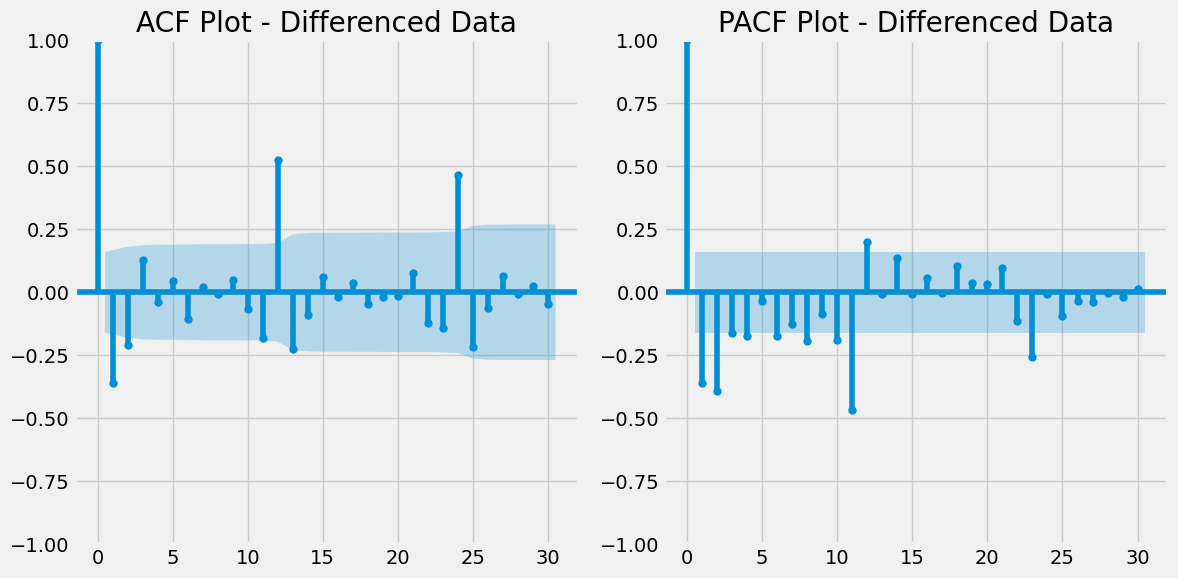

In [110]:
# ACF and PACF for stationary data (after differencing)
plt.figure(figsize=(12, 6))

# ACF plot (for MA term)
plt.subplot(1, 2, 1)
plot_acf(train_data['rose_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF Plot - Differenced Data')

# PACF plot (for AR term)
plt.subplot(1, 2, 2)
plot_pacf(train_data['rose_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF Plot - Differenced Data')

plt.tight_layout()
plt.show()



1. **ACF Plot (left plot)**:
   - Shows significant spikes at lag 1 and lag 11, suggesting that the moving average (MA) component might be of order 1 or 11.
   - Other lags fall within the confidence interval, indicating higher-order MA terms are not significant.

2. **PACF Plot (right plot)**:
   - Shows significant spikes at lag 1 and lag 11, suggesting that the autoregressive (AR) component might be of order 1 or 11.
   - Other lags fall within the confidence interval, indicating higher-order AR terms are not significant.

**Values**:
- **P (order of AR component):** 1
- **Q (order of MA component):** 1 or 11



### Build ARIMA Model - Auto ARIMA

In [111]:
# Auto ARIMA Model (automatically selects best ARIMA model)
auto_arima_model = auto_arima(train_data['rose_diff'], seasonal=False, trace=True, suppress_warnings=True)

# Summary of Auto ARIMA model
print("Auto ARIMA Model Summary:")
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1447.041, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1508.316, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1489.585, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1448.145, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1445.047, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1445.494, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1446.461, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1447.042, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1445.991, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1447.110, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.984 seconds
Auto ARIMA Model Summary:
                               SARIMAX Results                          

### Build ARIMA Model - Manual ARIMA

In [112]:
import itertools

# Define possible values for p, d, q
p = q = range(0, 3)  # AR and MA terms
d = range(0, 1)  # Differencing term (0 means no differencing)

# Create all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Extend pdq to include seasonal ARIMA (SARIMA) with seasonal periods
model_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Creating an empty DataFrame to store the results
dfObj = pd.DataFrame(columns=['param', 'AIC'])

# Fit ARIMA models and calculate AIC
for param in pdq:
    try:
        # Fit ARIMA model using the parameter combination (p, d, q)
        mod = ARIMA(train_data['rose_diff'], order=param)
        results_Arima = mod.fit()  # Fit the model to the data
        print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))  # Print AIC for this model

       # Store results into a temporary DataFrame
        temp_df = pd.DataFrame({'param': [param], 'AIC': [results_Arima.aic]})

        # Concatenate the new results to the main DataFrame
        dfObj = pd.concat([dfObj, temp_df], ignore_index=True)
    except Exception as e:
        # In case of any errors with specific parameter combinations (e.g., non-stationary data)
        print(f"Error with ARIMA{param}: {e}")

# Summary of the Manual ARIMA model
dfObj.sort_values(by=['AIC'])

ARIMA(0, 0, 0) - AIC:1510.3033190146793
ARIMA(0, 0, 1) - AIC:1443.3331324621145
ARIMA(0, 0, 2) - AIC:1439.3386861770625
ARIMA(1, 0, 0) - AIC:1491.55504816036
ARIMA(1, 0, 1) - AIC:1440.3389771736493
ARIMA(1, 0, 2) - AIC:1439.197400874333
ARIMA(2, 0, 0) - AIC:1468.7675778448818
ARIMA(2, 0, 1) - AIC:1441.3574103122874
ARIMA(2, 0, 2) - AIC:1441.1756259965523


param          AIC
5  (1, 0, 2)  1439.197401
2  (0, 0, 2)  1439.338686
4  (1, 0, 1)  1440.338977
8  (2, 0, 2)  1441.175626
7  (2, 0, 1)  1441.357410
1  (0, 0, 1)  1443.333132
6  (2, 0, 0)  1468.767578
3  (1, 0, 0)  1491.555048
0  (0, 0, 0)  1510.303319

In [113]:
## ARIMA(1, 0, 2) has the lowest AIC
mod = ARIMA(train_data['Rose'], order=(1,0,2))

manual_arima_result = mod.fit()

print(manual_arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  149
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -719.753
Date:                Sun, 05 Jan 2025   AIC                           1449.505
Time:                        10:23:23   BIC                           1464.525
Sample:                    01-01-1980   HQIC                          1455.607
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.1253     41.622      2.406      0.016      18.548     181.703
ar.L1          0.9928      0.016     61.879      0.000       0.961       1.024
ma.L1         -0.7002      0.081     -8.676      0.0

### Build SARIMA Model - Auto SARIMA

In [114]:
# Auto SARIMA (Seasonal ARIMA)
auto_sarima_model = auto_arima(train_data['rose_diff'], seasonal=True, m=12, trace=True, suppress_warnings=True)

# Summary of Auto SARIMA model
print("\nAuto SARIMA Model Summary:")
print(auto_sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1510.303, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1443.838, Time=0.35 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1508.316, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1491.555, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1431.272, Time=0.97 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1444.978, Time=0.56 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1409.730, Time=1.16 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1420.315, Time=0.60 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=4.16 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1407.2

### Build SARIMA Model - Manual SARIMA

In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define possible seasonal orders
p = d = q = range(0, 2)  # SARIMA parameters for AR, I, MA
P = D = Q = range(0, 2)  # Seasonal AR, differencing, and MA

# Create combinations of all parameter possibilities
pdq = list(itertools.product(p, d, q))

# Creating an empty DataFrame to store results
df_sarima = pd.DataFrame(columns=['param','seasonal', 'AIC'])

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Loop through all seasonal parameter combinations and fit the SARIMA model
for param in pdq:
    for param_seasonal in model_pdq:
      try:
          # Fit SARIMA model using the parameter combination (p, d, q, P, D, Q, S)
          mod = SARIMAX(train_data['rose_diff'], order=param, seasonal_order=param_seasonal)
          results_sarima = mod.fit()  # Fit the model to the data

          # Print AIC for the current SARIMA model
          print(f'SARIMA{param}{param_seasonal} - AIC: {results_sarima.aic}')

          # Store results into a temporary DataFrame
          temp_df = pd.DataFrame({'param': [param], 'seasonal':[param_seasonal], 'AIC': [results_sarima.aic]})

          # Concatenate the new results to the main DataFrame
          df_sarima = pd.concat([df_sarima, temp_df], ignore_index=True)
      except Exception as e:
          # In case of any errors with specific parameter combinations (e.g., non-stationary data)
          print(f"Error with SARIMA{param}: {e}")

# Display the results DataFrame
print(df_sarima)

SARIMA(0, 0, 0)(0, 0, 0, 12) - AIC: 1508.3164159738067
SARIMA(0, 0, 0)(0, 0, 1, 12) - AIC: 1475.4615466542846
SARIMA(0, 0, 0)(0, 1, 0, 12) - AIC: 1362.5988806138203
SARIMA(0, 0, 0)(0, 1, 1, 12) - AIC: 1314.8473520182365
SARIMA(0, 0, 0)(1, 0, 0, 12) - AIC: 1454.9232311206397
SARIMA(0, 0, 0)(1, 0, 1, 12) - AIC: 1431.121572546186
SARIMA(0, 0, 0)(1, 1, 0, 12) - AIC: 1334.9815492824969
SARIMA(0, 0, 0)(1, 1, 1, 12) - AIC: 1316.8480050930991
SARIMA(0, 0, 1)(0, 0, 0, 12) - AIC: 1448.144655075012
SARIMA(0, 0, 1)(0, 0, 1, 12) - AIC: 1417.7051803720706
SARIMA(0, 0, 1)(0, 1, 0, 12) - AIC: 1323.7335201710127
SARIMA(0, 0, 1)(0, 1, 1, 12) - AIC: 1264.7652727095244
SARIMA(0, 0, 1)(1, 0, 0, 12) - AIC: 1402.5328833320418
SARIMA(0, 0, 1)(1, 0, 1, 12) - AIC: 1375.1571500491245
SARIMA(0, 0, 1)(1, 1, 0, 12) - AIC: 1292.706884955201
SARIMA(0, 0, 1)(1, 1, 1, 12) - AIC: 1266.3734622826823
SARIMA(0, 1, 0)(0, 0, 0, 12) - AIC: 1647.4511886975813
SARIMA(0, 1, 0)(0, 0, 1, 12) - AIC: 1611.5876411549177
SARIMA(0, 1, 

In [116]:
# Summary of the Manual ARIMA model
df_sarima.sort_values(by=['AIC'])

param       seasonal          AIC
43  (1, 0, 1)  (0, 1, 1, 12)  1264.607579
11  (0, 0, 1)  (0, 1, 1, 12)  1264.765273
47  (1, 0, 1)  (1, 1, 1, 12)  1266.296740
15  (0, 0, 1)  (1, 1, 1, 12)  1266.373462
46  (1, 0, 1)  (1, 1, 0, 12)  1290.918045
..        ...            ...          ...
49  (1, 1, 0)  (0, 0, 1, 12)  1563.257382
20  (0, 1, 0)  (1, 0, 0, 12)  1583.477717
48  (1, 1, 0)  (0, 0, 0, 12)  1595.271296
17  (0, 1, 0)  (0, 0, 1, 12)  1611.587641
16  (0, 1, 0)  (0, 0, 0, 12)  1647.451189

[64 rows x 3 columns]

In [117]:
## SARIMA(1, 0, 1)(0, 1, 1, 12) has the lowest AIC
mod = SARIMAX(train_data['Rose'],
                                order=(1,0,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
manual_sarima_result = mod.fit()
print(manual_sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  149
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -526.341
Date:                            Sun, 05 Jan 2025   AIC                           1060.683
Time:                                    10:25:59   BIC                           1071.931
Sample:                                01-01-1980   HQIC                          1065.252
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9859      0.012     79.510      0.000       0.962       1.010
ma.L1         -0.8787      0.049   

## Compare the performance of the models

### Check the performance of the models (using RMSE, MAE, MAPE)

In [118]:
def evaluate_model(true, forecast):
    # Exclude zero values from true series when calculating MAPE
    true = np.array(true)
    non_zero_mask = true != 0  # Mask to exclude zero values
    true_non_zero = true[non_zero_mask]
    forecast_non_zero = forecast[non_zero_mask]

    # Calculate RMSE, MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(true_non_zero, forecast_non_zero))
    mae = mean_absolute_error(true_non_zero, forecast_non_zero)
    mape = np.mean(np.abs((true_non_zero - forecast_non_zero) / true_non_zero)) * 100
    return rmse, mae, mape


def plot_forecast(true, forecast, title):
    plt.figure(figsize=(12, 6))
    plt.plot(true.index, true, label="Actual", color="blue", linewidth=2)
    plt.plot(true.index[-len(forecast):], forecast, label="Forecast", color="black", linestyle="--", linewidth=2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Rose Sales")
    plt.legend()
    plt.show()


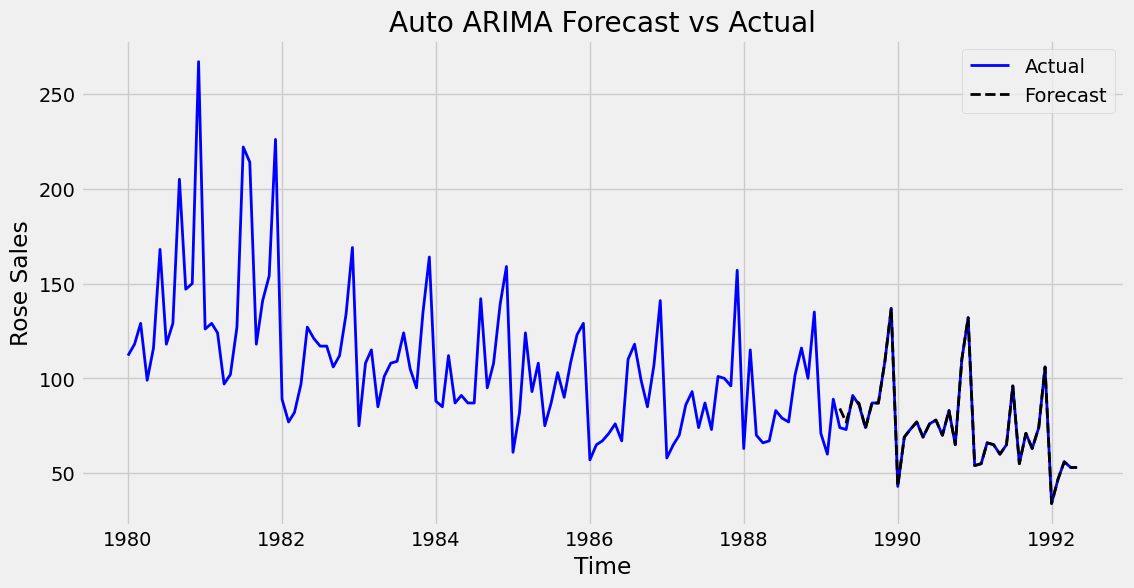

In [119]:
# Forecast using Auto ARIMA Model
auto_arima_forecast = auto_arima_model.predict(n_periods=len(test_data))
auto_arima_forecast_original = auto_arima_forecast + train_data['Rose'].iloc[-len(auto_arima_forecast):].values

# Evaluate Auto ARIMA Model
auto_arima_rmse, auto_arima_mae, auto_arima_mape = evaluate_model(
    train_data['rose_diff'].iloc[-len(auto_arima_forecast):], auto_arima_forecast_original)

# Visualize Auto ARIMA forecast
plot_forecast(train_data['Rose'], auto_arima_forecast_original, "Auto ARIMA Forecast vs Actual")

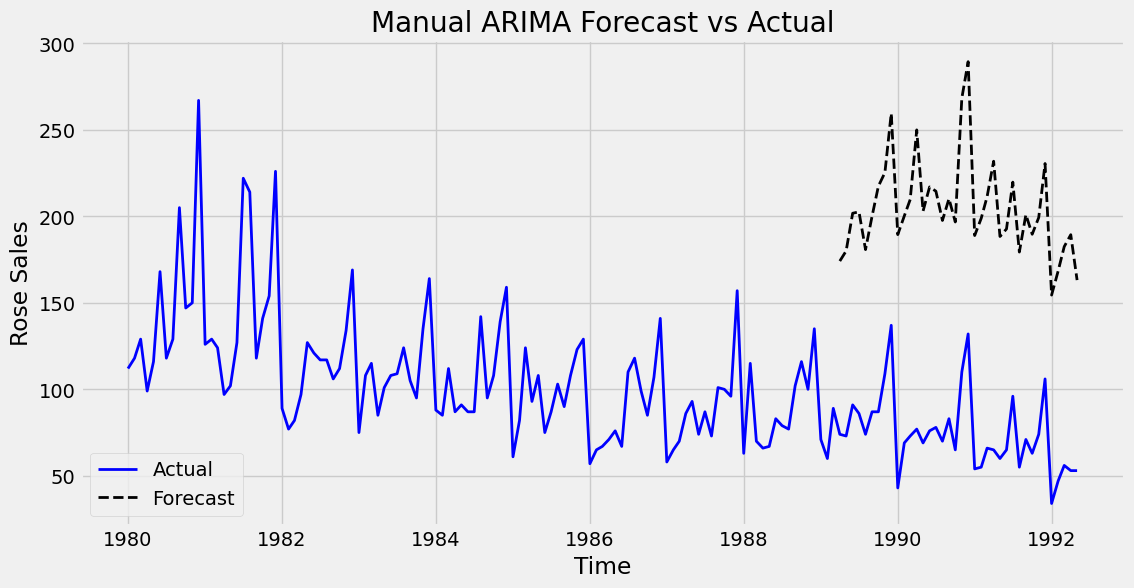

In [120]:
# Forecast using Manual ARIMA Model
manual_arima_forecast = manual_arima_result.predict(start=0, end=len(test_data)-1)
manual_arima_forecast_original = manual_arima_forecast + train_data['Rose'].iloc[-len(manual_arima_forecast):].values

# Evaluate Manual ARIMA Model
manual_arima_rmse, manual_arima_mae, manual_arima_mape = evaluate_model(
    train_data['rose_diff'].iloc[-len(manual_arima_forecast):], manual_arima_forecast_original)

# Visualize Manual ARIMA forecast
plot_forecast(train_data['Rose'], manual_arima_forecast_original, "Manual ARIMA Forecast vs Actual")

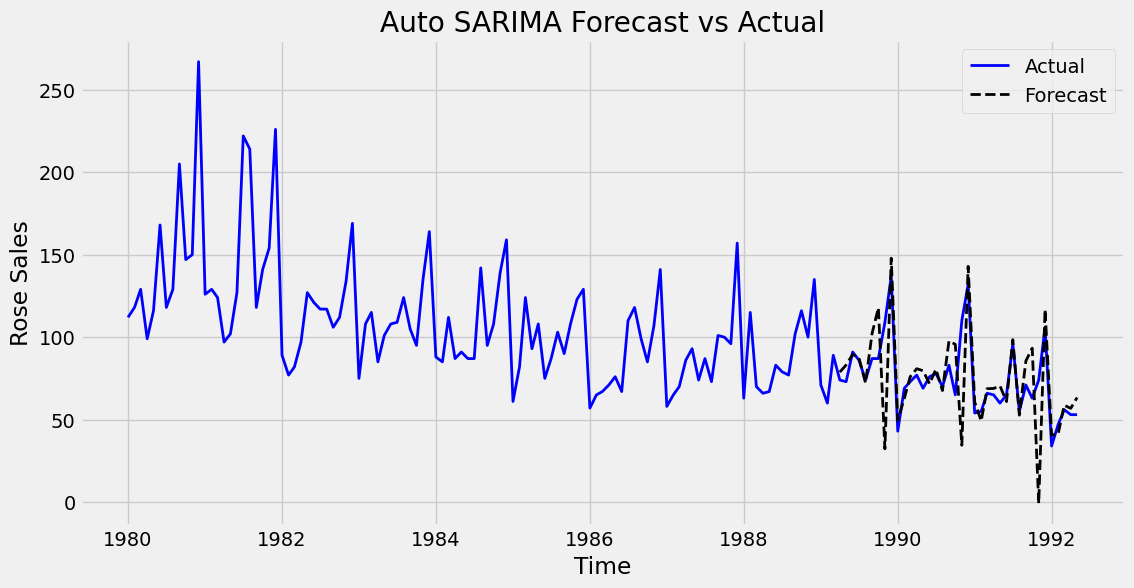

In [121]:
# Forecast using Auto SARIMA Model
auto_sarima_forecast = auto_sarima_model.predict(n_periods=len(test_data))
auto_sarima_forecast_original = auto_sarima_forecast + train_data['Rose'].iloc[-len(auto_sarima_forecast):].values

# Evaluate Auto SARIMA Model
auto_sarima_rmse, auto_sarima_mae, auto_sarima_mape = evaluate_model(
    train_data['rose_diff'].iloc[-len(auto_sarima_forecast):], auto_sarima_forecast_original)

# Visualize Auto SARIMA forecast
plot_forecast(train_data['Rose'], auto_sarima_forecast_original, "Auto SARIMA Forecast vs Actual")

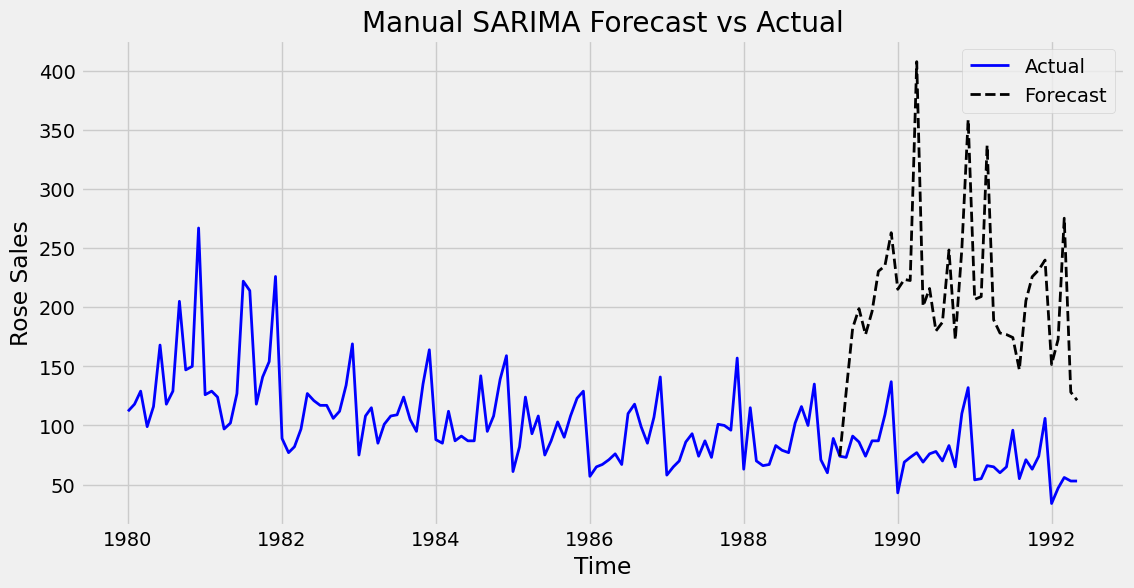

In [122]:
# Forecast using Manual SARIMA Model
manual_sarima_forecast = manual_sarima_result.predict(start=0, end=len(test_data)-1)
manual_sarima_forecast_original = manual_sarima_forecast + train_data['Rose'].iloc[-len(manual_sarima_forecast):].values

# Evaluate Manual SARIMA Model
manual_sarima_rmse, manual_sarima_mae, manual_sarima_mape = evaluate_model(
    train_data['rose_diff'].iloc[-len(manual_sarima_forecast):], manual_sarima_forecast_original)

# Visualize Manual SARIMA forecast
plot_forecast(train_data['Rose'], manual_sarima_forecast_original, "Manual SARIMA Forecast vs Actual")

In [123]:
# Create a DataFrame to display the performance metrics
performance_metrics = {
    'Model': ['Auto ARIMA', 'Manual ARIMA', 'Auto SARIMA', 'Manual SARIMA'],
    'RMSE': [auto_arima_rmse, manual_arima_rmse, auto_sarima_rmse, manual_sarima_rmse],
    'MAE': [auto_arima_mae, manual_arima_mae, auto_sarima_mae, manual_sarima_mae],
    'MAPE': [auto_arima_mape, manual_arima_mape, auto_sarima_mape, manual_sarima_mape]
}

performance_df = pd.DataFrame(performance_metrics)

# Display the performance metrics table
print("\nModel Performance Evaluation (RMSE, MAE, MAPE):")
print(performance_df)


Model Performance Evaluation (RMSE, MAE, MAPE):
           Model        RMSE         MAE         MAPE
0     Auto ARIMA   79.457275   76.245027  1261.783062
1   Manual ARIMA  208.198035  206.447296  3740.284529
2    Auto SARIMA   82.429414   76.003127  1291.460551
3  Manual SARIMA  220.092126  211.691383  3570.634616


### Choose the best model

**Model Performance Comparison**

Based on the provided performance metrics (RMSE, MAE, MAPE):

1. **Auto ARIMA:**
   - **RMSE:** 79.46 (lowest among all models, indicating better fit)
   - **MAE:** 76.25 (slightly higher than Auto SARIMA)
   - **MAPE:** 1261.78 (lowest percentage error)

2. **Manual ARIMA:**
   - **RMSE:** 208.20 (significantly higher than Auto ARIMA and Auto SARIMA)
   - **MAE:** 206.45 (poorer performance)
   - **MAPE:** 3740.28 (highest error percentage)

3. **Auto SARIMA:**
   - **RMSE:** 82.43 (second lowest)
   - **MAE:** 76.00 (slightly better than Auto ARIMA)
   - **MAPE:** 1291.46 (slightly higher than Auto ARIMA)

4. **Manual SARIMA:**
   - **RMSE:** 220.09 (highest)
   - **MAE:** 211.69 (poorest performance)
   - **MAPE:** 3570.63 (second highest error percentage)

---

**Rationale for Choosing the Best Model**

- **Auto ARIMA** has the best performance with:
  - The lowest **RMSE** and **MAPE**.
  - A **MAE** comparable to Auto SARIMA, indicating minimal absolute error.
- While Auto SARIMA performs similarly, its slightly higher RMSE and MAPE make Auto ARIMA the better choice.



### Rebuild the Best Model Using the Entire Data

In [124]:
# Fit the Auto ARIMA model on the entire data
auto_arima_model_full = auto_arima(data_rose['rose_diff'], seasonal=True, m=12, stepwise=True, trace=True)

# Display the summary of the Auto ARIMA model
print(auto_arima_model_full.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.58 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1863.357, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1771.225, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1861.365, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1838.953, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1753.471, Time=1.11 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1738.569, Time=1.45 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1736.795, Time=0.57 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1796.362, Time=0.31 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1738.580, Time=1.15 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1779.335, Time=0.86 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.56 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1756.170, Time=1.59 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept

### Forecast for the Next 12 Months

In [125]:
# Generate a forecast for the next 12 months
auto_arima_forecast_full = auto_arima_model_full.predict(n_periods=12)

# Extend the index to include future periods
future_index = pd.date_range(start=data_rose.index[-1], periods=13, freq='MS')[1:]

# Create a DataFrame for the forecast
auto_arima_forecast_df = pd.DataFrame({
    'Date': future_index,
    'Auto ARIMA Forecast': auto_arima_forecast_full
}).set_index('Date')

# Display the forecast
print("\nAuto ARIMA 12-Month Forecast:")
print(auto_arima_forecast_df)



Auto ARIMA 12-Month Forecast:
            Auto ARIMA Forecast
Date                           
1995-08-01           -16.498442
1995-09-01            -1.024543
1995-10-01             1.163165
1995-11-01             8.070404
1995-12-01            31.496164
1996-01-01           -68.135473
1996-02-01             8.279913
1996-03-01             7.052188
1996-04-01            -3.841472
1996-05-01            -0.830225
1996-06-01             5.120906
1996-07-01             9.580248


### Visualize the Forecast

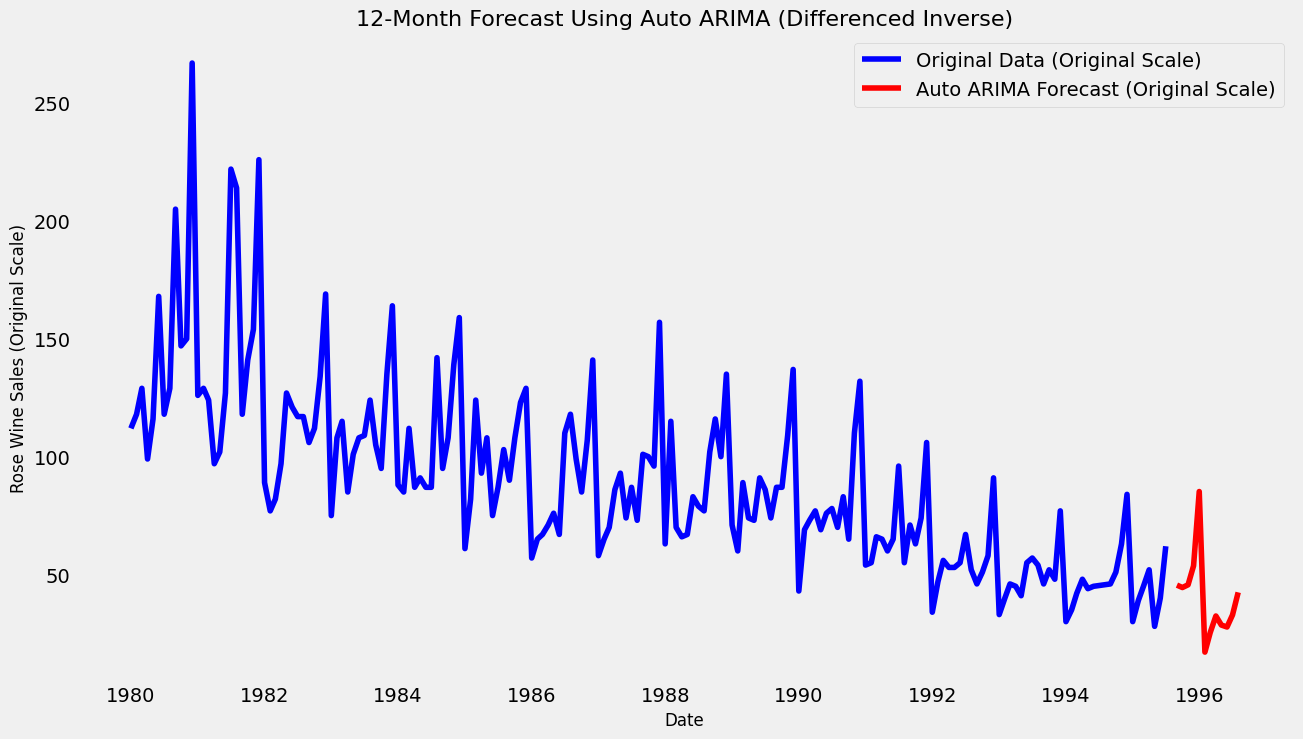

In [126]:
# Forecast using Auto ARIMA Model
auto_arima_forecast_full_diff = auto_arima_model_full.predict(n_periods=12)

# Get the last known value from the original data (the last actual value of 'Rose')
last_known_value = data_rose['Rose'].iloc[-1]

# Invert differencing (add the differenced forecast back to the last known value)
auto_arima_forecast_full_original = [last_known_value + auto_arima_forecast_full_diff[0]]

# Revert the differenced forecast back to original scale step-by-step
for i in range(1, len(auto_arima_forecast_full_diff)):
    original_value = auto_arima_forecast_full_original[i-1] + auto_arima_forecast_full_diff[i]
    auto_arima_forecast_full_original.append(original_value)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(data_rose.index, data_rose['Rose'], label='Original Data (Original Scale)', color='blue')
future_index = pd.date_range(data_rose.index[-1], periods=13, freq='M')[1:]  # Adjust the future index
plt.plot(future_index, auto_arima_forecast_full_original, label='Auto ARIMA Forecast (Original Scale)', linestyle='-', color='red')
plt.title('12-Month Forecast Using Auto ARIMA (Differenced Inverse)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rose Wine Sales (Original Scale)', fontsize=12)
plt.legend()
plt.grid()
plt.show()


## Key Takeaways

- **Rose Wine Sales Trend**: There's a general downward trend in Rose wine sales from 1980 to 1994. Sales peaked around 1980 and experienced a significant decline afterward.
- **Seasonality**: Rose wine sales exhibit seasonality, with a notable spike in December, likely due to holiday celebrations. Sales remain relatively stable throughout the rest of the year.
- **Data Volatility**: Sales growth rate fluctuates significantly, indicating high variability in sales performance.
- **Stationarity**: The original sales data is non-stationary, but differencing makes it stationary.
- **Model Performance**: Holt-Winters and Triple EMA models performed well in capturing the trend and seasonality of the original data, but Auto ARIMA outperformed other models on the stationary data.

## Actionable Insights

- **Focus on Holiday Season**: Marketing and sales efforts should be intensified during December to capitalize on the holiday demand for Rose wine.
- **Address Sales Decline**: Strategies to address the overall declining trend should be explored. This could involve product diversification, new marketing campaigns, or exploring new markets.
- **Manage Volatility**: Implement inventory management practices to handle sales fluctuations. Consider strategies to mitigate risk during periods of decline.
- **Leverage Seasonality**: Forecasting models should incorporate seasonality to improve accuracy and planning.

## Recommendations

- **Model Selection**: For forecasting, consider using the Auto ARIMA model as it demonstrated the best performance on the stationary data.
- **Data Preprocessing**: Differencing should be applied to the data to make it stationary before applying forecasting models like ARIMA or SARIMA.
- **Continuous Monitoring**: Track sales performance closely and regularly review model accuracy. Adjust strategies and models as needed to adapt to market changes.
- **External Factors**: Investigate external factors that might be contributing to the declining trend, such as changes in consumer preferences or economic conditions.